Naive Bayes Classifiers to predict the type of mouse (WT, AS, PS) from hand trajectory or from neural activity -------CODE ADAPTED ONLY FOR WT VS AS

In [91]:
import sys
import os
sys.path.append(os.path.abspath("C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code"))
import hdf5storage
import mat73
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math

import CURBD.curbd as curbd
import PyalData.pyaldata as pyaldata

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [210]:
data_dir_WTM350 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/WT-M350/WT-M350-pyaldata2" 
data_dir_WTM355 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/WT-M355/WT-M355-pyaldata2" 
data_dir_ASM351 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/AS-M351/AS-M351-pyaldata2" 
data_dir_ASM354 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/AS-M354/AS-M354-pyaldata2" 
data_dir_PSM365 = "C:/Users/MARA/Desktop/IMPERIAL YEAR 4/Final year project/code/datasets/autism data/PS-M365/PS-M365-pyaldata2" 

Classifier to predict type (WT, AS, PS) from neural activity during first half a second after movement onset

In [122]:
# consider all models, and no thalamus: compute 5D PCA manifolds for each trial, m1, dcn, str and finally all 3 regions
 
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

class_indices = {'WT-M350':1,
                'WT-M355':1, 
                'AS-M351':2,
                'AS-M354':2}
X_data_5 = {'WT':[],'AS':[]}
X_data_m1_5 = {'WT':[],'AS':[]}
X_data_dcn_5 = {'WT':[],'AS':[]}
X_data_str_5 = {'WT':[],'AS':[]}
X = []
y = []

for data_dir in [ data_dir_WTM355]:
    animal_model = data_dir[-17:-10]
    animal_type = data_dir[-17:-15]
    files = os.listdir(data_dir)
    for file_name in [files[4]]:
        print(file_name)
        fpath = os.path.join(data_dir, file_name)
        df = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
        df = pyaldata.select_trials(df, "success == 1")  # only consider successful trials
        
        if len(df)>1:
            df["trial_id"] = range(len(df))
            df = pyaldata.combine_time_bins(df, 5)
            spike_fields = ["m1_spikes","dcn_spikes","str_spikes"]

            for col in spike_fields:
                df = pyaldata.remove_low_firing_neurons(df, col,  1)
            for col in spike_fields:
                df = pyaldata.transform_signal(df, col,  'sqrt')
            df = pyaldata.merge_signals(df, spike_fields, "all_spikes")
            df = pyaldata.add_firing_rates(df, 'smooth')
            df = pyaldata.restrict_to_interval(df, "idx_mo", end_point_name=None, rel_start=-50, rel_end=50)  # consider half a second before and after movement onset

            concat_m1_rates = pyaldata.concat_trials(df, 'dcn_rates')

            m1_pca_WTM355 = pca.fit_transform(concat_m1_rates)
            



WT-M355_session13.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_23668\46072595.py:39: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [ 7 

In [123]:
# consider all models, and no thalamus: compute 5D PCA manifolds for each trial, m1, dcn, str and finally all 3 regions
 
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

class_indices = {'WT-M350':1,
                'WT-M355':1, 
                'AS-M351':2,
                'AS-M354':2}
X_data_5 = {'WT':[],'AS':[]}
X_data_m1_5 = {'WT':[],'AS':[]}
X_data_dcn_5 = {'WT':[],'AS':[]}
X_data_str_5 = {'WT':[],'AS':[]}
X = []
y = []

for data_dir in [ data_dir_ASM351]:
    animal_model = data_dir[-17:-10]
    animal_type = data_dir[-17:-15]
    files = os.listdir(data_dir)
    for file_name in [files[7]]:
        print(file_name)
        fpath = os.path.join(data_dir, file_name)
        df = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
        df = pyaldata.select_trials(df, "success == 1")  # only consider successful trials
        
        if len(df)>1:
            df["trial_id"] = range(len(df))
            df = pyaldata.combine_time_bins(df, 5)
            spike_fields = ["m1_spikes","dcn_spikes","str_spikes"]

            for col in spike_fields:
                df = pyaldata.remove_low_firing_neurons(df, col,  1)
            for col in spike_fields:
                df = pyaldata.transform_signal(df, col,  'sqrt')
            df = pyaldata.merge_signals(df, spike_fields, "all_spikes")
            df = pyaldata.add_firing_rates(df, 'smooth')
            df = pyaldata.restrict_to_interval(df, "idx_mo", end_point_name=None, rel_start=-50, rel_end=50)  # consider half a second before and after movement onset

            concat_m1_rates = pyaldata.concat_trials(df, 'dcn_rates')

            m1_pca_ASM351 = pca.fit_transform(concat_m1_rates)
            



AS-M351_session8.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_23668\839296012.py:39: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [1]

In [124]:
trial_data_wt = [m1_pca_WTM355[0:101,:],m1_pca_WTM355[101:202,:],m1_pca_WTM355[202:303,:],m1_pca_WTM355[303:404,:],m1_pca_WTM355[404:505,:],m1_pca_WTM355[505:606,:],m1_pca_WTM355[606:707,:],m1_pca_WTM355[707:808,:],m1_pca_WTM355[808:909,:],m1_pca_WTM355[909:1010,:],m1_pca_WTM355[1010:1111,:],m1_pca_WTM355[1111:1212,:]]
trial_data_as = [m1_pca_ASM351[0:101,:],m1_pca_ASM351[101:202,:],m1_pca_ASM351[202:303,:],m1_pca_ASM351[303:404,:],m1_pca_ASM351[404:505,:],m1_pca_ASM351[505:606,:],m1_pca_ASM351[606:707,:],m1_pca_ASM351[707:808,:],m1_pca_ASM351[808:909,:],m1_pca_ASM351[909:1010,:],m1_pca_ASM351[1010:1111,:],m1_pca_ASM351[1111:1212,:]]

In [125]:
# Decoder from 10D PCA m1 activity to type:
import random

random.shuffle(trial_data_wt)
random.shuffle(trial_data_as)


# Step 3: Combine the sampled subsets
X_balanced = np.concatenate((trial_data_wt,trial_data_as))
y_balanced = np.concatenate((['WT'] * 12, ['AS'] * 12))

# Optionally, shuffle the combined dataset
indices = np.arange(len(X_balanced))
np.random.shuffle(indices)
X_balanced = X_balanced[indices]
y_balanced = y_balanced[indices]

X_balanced_reshaped = X_balanced.reshape(len(X_balanced),-1)  # convert to 2d array (needed for the NB classifier)
y_balanced_reshaped = y_balanced.reshape(len(y_balanced),-1)


# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced_reshaped, y_balanced_reshaped, test_size=0.2, random_state=10)


# Initialize Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Train classifier
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Define k for k-fold cross-validation

from sklearn.model_selection import KFold, cross_val_score
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(classifier, X_balanced_reshaped, y_balanced_reshaped, cv=kf)
scores



Accuracy: 1.0


c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConve

array([1., 1., 1., 1., 1.])

In [223]:
# consider all models, and no thalamus: compute 5D PCA manifolds for each trial, m1, dcn, str and finally all 3 regions
 
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

class_indices = {'WT-M350':1,
                'WT-M355':1, 
                'AS-M351':2,
                'AS-M354':2}
X_data_5 = {'WT':[],'AS':[]}
X_data_m1_5 = {'WT':[],'AS':[]}
X_data_dcn_5 = {'WT':[],'AS':[]}
X_data_str_5 = {'WT':[],'AS':[]}
X = []
y = []

for data_dir in [ data_dir_WTM355]:
    animal_model = data_dir[-17:-10]
    animal_type = data_dir[-17:-15]
    files = os.listdir(data_dir)
    for file_name in [files[4]]:
        print(file_name)
        fpath = os.path.join(data_dir, file_name)
        df = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
        df = pyaldata.select_trials(df, "success == 1")  # only consider successful trials
        
        if len(df)>1:
            df["trial_id"] = range(len(df))
            df = pyaldata.combine_time_bins(df, 5)
            spike_fields = ["m1_spikes","dcn_spikes","str_spikes"]

            for col in spike_fields:
                df = pyaldata.remove_low_firing_neurons(df, col,  1)
            for col in spike_fields:
                df = pyaldata.transform_signal(df, col,  'sqrt')
            df = pyaldata.merge_signals(df, spike_fields, "all_spikes")
            df = pyaldata.add_firing_rates(df, 'smooth')
            df = pyaldata.restrict_to_interval(df, "idx_mo", end_point_name=None, rel_start=-50, rel_end=50)  # consider half a second before and after movement onset

            concat_m1_rates_wt = pyaldata.concat_trials(df, 'dcn_rates')

            m1_pca_WTM355 = pca.fit_transform(concat_m1_rates_wt)
            



WT-M355_session13.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_23668\659545949.py:39: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [ 7

In [222]:
# consider all models, and no thalamus: compute 5D PCA manifolds for each trial, m1, dcn, str and finally all 3 regions
 
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

class_indices = {'WT-M350':1,
                'WT-M355':1, 
                'AS-M351':2,
                'AS-M354':2}
X_data_5 = {'WT':[],'AS':[]}
X_data_m1_5 = {'WT':[],'AS':[]}
X_data_dcn_5 = {'WT':[],'AS':[]}
X_data_str_5 = {'WT':[],'AS':[]}
X = []
y = []

for data_dir in [ data_dir_WTM355]:
    animal_model = data_dir[-17:-10]
    animal_type = data_dir[-17:-15]
    files = os.listdir(data_dir)
    for file_name in [files[6]]:
        print(file_name)
        fpath = os.path.join(data_dir, file_name)
        df = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
        df = pyaldata.select_trials(df, "success == 1")  # only consider successful trials
        
        if len(df)>1:
            df["trial_id"] = range(len(df))
            df = pyaldata.combine_time_bins(df, 5)
            spike_fields = ["m1_spikes","dcn_spikes","str_spikes"]

            for col in spike_fields:
                df = pyaldata.remove_low_firing_neurons(df, col,  1)
            for col in spike_fields:
                df = pyaldata.transform_signal(df, col,  'sqrt')
            df = pyaldata.merge_signals(df, spike_fields, "all_spikes")
            df = pyaldata.add_firing_rates(df, 'smooth')
            df = pyaldata.restrict_to_interval(df, "idx_mo", end_point_name=None, rel_start=-50, rel_end=50)  # consider half a second before and after movement onset

            concat_m1_rates_wt = pyaldata.concat_trials(df, 'dcn_rates')

            m1_pca_WTM355_2 = pca.fit_transform(concat_m1_rates_wt)
            



WT-M355_session15.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_23668\2073488710.py:39: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [6

In [175]:
np.shape(m1_pca_WTM355_2)

(1717, 10)

In [221]:
# consider all models, and no thalamus: compute 5D PCA manifolds for each trial, m1, dcn, str and finally all 3 regions
 
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

class_indices = {'WT-M350':1,
                'WT-M355':1, 
                'AS-M351':2,
                'AS-M354':2}
X_data_5 = {'WT':[],'AS':[]}
X_data_m1_5 = {'WT':[],'AS':[]}
X_data_dcn_5 = {'WT':[],'AS':[]}
X_data_str_5 = {'WT':[],'AS':[]}
X = []
y = []

for data_dir in [ data_dir_PSM365]:
    animal_model = data_dir[-17:-10]
    animal_type = data_dir[-17:-15]
    files = os.listdir(data_dir)
    for file_name in [files[2]]:
        print(file_name)
        fpath = os.path.join(data_dir, file_name)
        df = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
        df = pyaldata.select_trials(df, "success == 1")  # only consider successful trials
        
        if len(df)>1:
            df["trial_id"] = range(len(df))
            df = pyaldata.combine_time_bins(df, 5)
            spike_fields = ["m1_spikes","dcn_spikes","str_spikes"]

            for col in spike_fields:
                df = pyaldata.remove_low_firing_neurons(df, col,  1)
            for col in spike_fields:
                df = pyaldata.transform_signal(df, col,  'sqrt')
            df = pyaldata.merge_signals(df, spike_fields, "all_spikes")
            df = pyaldata.add_firing_rates(df, 'smooth')
            df = pyaldata.restrict_to_interval(df, "idx_mo", end_point_name=None, rel_start=-50, rel_end=50)  # consider half a second before and after movement onset

            concat_m1_rates_as = pyaldata.concat_trials(df, 'dcn_rates')

            m1_pca_ASM351 = pca.fit_transform(concat_m1_rates_as)
            



PS-M365_session2.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


In [214]:
np.shape(concat_m1_rates_as)

(1313, 31)

In [217]:
np.shape(m1_pca_ASM351)

(2727, 10)

In [167]:
np.shape(m1_pca_WTM355)

(1717, 10)

In [153]:
concat_m1_rates_as = concat_m1_rates_as[:1717,:46]
concat_m1_rates_wt = concat_m1_rates_wt[:1717,:46]

In [154]:

concat_concat = np.vstack([concat_m1_rates_wt, concat_m1_rates_as])

# Apply PCA
pca_model = PCA(n_components=3)
pca_model.fit(concat_concat)
principal_eigenvectors = pca_model.components_
np.shape(principal_eigenvectors)

m1_pca_WTM355 = pca_model.transform(concat_m1_rates_wt)
m1_pca_ASM351 = pca_model.transform(concat_m1_rates_as)



ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 45 and the array at index 1 has size 32

In [197]:
np.shape(m1_pca_ASM351)

(1717, 10)

In [ ]:
trial_data_wt = [m1_pca_WTM355[0:101,:],m1_pca_WTM355[101:202,:],m1_pca_WTM355[202:303,:],m1_pca_WTM355[303:404,:],m1_pca_WTM355[404:505,:],m1_pca_WTM355[505:606,:],m1_pca_WTM355[606:707,:],m1_pca_WTM355[707:808,:],m1_pca_WTM355[808:909,:],m1_pca_WTM355[909:1010,:],m1_pca_WTM355[1010:1111,:],m1_pca_WTM355[1111:1212,:]]
trial_data_as = [m1_pca_ASM351[0:101,:],m1_pca_ASM351[101:202,:],m1_pca_ASM351[202:303,:],m1_pca_ASM351[303:404,:],m1_pca_ASM351[404:505,:],m1_pca_ASM351[505:606,:],m1_pca_ASM351[606:707,:],m1_pca_ASM351[707:808,:],m1_pca_ASM351[808:909,:],m1_pca_ASM351[909:1010,:],m1_pca_ASM351[1010:1111,:],m1_pca_ASM351[1111:1212,:]]

In [ ]:
# Decoder from 10D PCA m1 activity to type:
import random

random.shuffle(trial_data_wt)
random.shuffle(trial_data_as)


# Step 3: Combine the sampled subsets
X_balanced = np.concatenate((trial_data_wt,trial_data_as))
y_balanced = np.concatenate((['WT'] * 12, ['AS'] * 12))

# Optionally, shuffle the combined dataset
indices = np.arange(len(X_balanced))
np.random.shuffle(indices)
X_balanced = X_balanced[indices]
y_balanced = y_balanced[indices]

X_balanced_reshaped = X_balanced.reshape(len(X_balanced),-1)  # convert to 2d array (needed for the NB classifier)
y_balanced_reshaped = y_balanced.reshape(len(y_balanced),-1)


# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced_reshaped, y_balanced_reshaped, test_size=0.2, random_state=10)


# Initialize Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Train classifier
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Define k for k-fold cross-validation

from sklearn.model_selection import KFold, cross_val_score
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(classifier, X_balanced_reshaped, y_balanced_reshaped, cv=kf)
scores



Accuracy: 1.0


c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConve

array([1., 1., 1., 1., 1.])

In [155]:
def canoncorr_torch(X:torch.Tensor, Y: torch.Tensor) -> torch.Tensor:
    """
    Canonical Correlation Analysis (CCA) using torch
    adapted from `canoncorr`, does not do fullReturn
    X,Y: (samples/observations) x (features) matrix, for both: X.shape[0] >> X.shape[1]
    
    r:   Canonical correlations
    
    Signature:
    r = canoncorr(X, Y)
    """
    n, p1 = X.shape
    p2 = Y.shape[1]
    if p1 >= n or p2 >= n:
        logging.warning('Not enough samples, might cause problems')

    #NOTE: removed centering since it did not work with backprop

    # Factor the inputs, and find a full rank set of columns if necessary
    Q1,T11 = torch.linalg.qr(X, mode='reduced')
    Q2,T22 = torch.linalg.qr(Y, mode='reduced')
    rankX = torch.sum(torch.abs(torch.diagonal(T11)) > torch.finfo(torch.abs(T11[0,0]).dtype).eps*max([n,p1]))
    rankY = torch.sum(torch.abs(torch.diagonal(T22)) > torch.finfo(torch.abs(T22[0,0]).dtype).eps*max([n,p1]))
    
    Q1 = Q1[:,:rankX]
    Q2 = Q2[:,:rankY]

    # Canonical correlations
    r = torch.linalg.svdvals(Q1.T @ Q2) 

    return r

NameError: name 'torch' is not defined

In [156]:
def canoncorr(X:np.array, Y: np.array, fullReturn: bool = False) -> np.array:
    """
    Canonical Correlation Analysis (CCA)
    line-by-line port from Matlab implementation of `canoncorr`
    X,Y: (samples/observations) x (features) matrix, for both: X.shape[0] >> X.shape[1]
    fullReturn: whether all outputs should be returned or just `r` be returned (not in Matlab)
    
    returns: A,B,r,U,V 
    A,B: Canonical coefficients for X and Y
    U,V: Canonical scores for the variables X and Y
    r:   Canonical correlations
    
    Signature:
    A,B,r,U,V = canoncorr(X, Y)
    """
    n, p1 = X.shape
    p2 = Y.shape[1]
    if p1 >= n or p2 >= n:
        logging.warning('Not enough samples, might cause problems')

    # Center the variables
    X = X - np.mean(X,0)
    Y = Y - np.mean(Y,0)

    # Factor the inputs, and find a full rank set of columns if necessary
    Q1,T11,perm1 = qr(X, mode='economic', pivoting=True, check_finite=True)

    rankX = sum(np.abs(np.diagonal(T11)) > np.finfo(type((np.abs(T11[0,0])))).eps*max([n,p1]))

    if rankX == 0:
        logging.error(f'stats:canoncorr:BadData = X')
    elif rankX < p1:
        logging.warning('stats:canoncorr:NotFullRank = X')
        Q1 = Q1[:,:rankX]
        T11 = T11[:rankX,:rankX]

    Q2,T22,perm2 = qr(Y, mode='economic', pivoting=True, check_finite=True)
    rankY = sum(np.abs(np.diagonal(T22)) > np.finfo(type((np.abs(T22[0,0])))).eps*max([n,p2]))

    if rankY == 0:
        logging.error(f'stats:canoncorr:BadData = Y')
    elif rankY < p2:
        logging.warning('stats:canoncorr:NotFullRank = Y')
        Q2 = Q2[:,:rankY]
        T22 = T22[:rankY,:rankY]

    # Compute canonical coefficients and canonical correlations.  For rankX >
    # rankY, the economy-size version ignores the extra columns in L and rows
    # in D. For rankX < rankY, need to ignore extra columns in M and D
    # explicitly. Normalize A and B to give U and V unit variance.
    d = min(rankX,rankY)
    L,D,M = svd(Q1.T @ Q2, full_matrices=True, check_finite=True, lapack_driver='gesdd')
    M = M.T

    A = inv(T11) @ L[:,:d] * np.sqrt(n-1)
    B = inv(T22) @ M[:,:d] * np.sqrt(n-1)
    r = D[:d]
    # remove roundoff errs
    r[r>=1] = 1
    r[r<=0] = 0

    if not fullReturn:
        return r

    # Put coefficients back to their full size and their correct order
    A[perm1,:] = np.vstack((A, np.zeros((p1-rankX,d))))
    B[perm2,:] = np.vstack((B, np.zeros((p2-rankY,d))))
    
    # Compute the canonical variates
    U = X @ A
    V = Y @ B

    return A, B, r, U, V

In [162]:
from scipy.linalg import qr, svd, inv

In [158]:
trial_data_as_array = np.asarray(trial_data_as)
trial_data_wt_array = np.asarray(trial_data_wt)

In [224]:
m1_pca_WTM355 = m1_pca_WTM355[:1717,:]
m1_pca_WTM355_2 = m1_pca_WTM355_2[:1717,:]

In [225]:
m1_pca_ASM351 = m1_pca_ASM351[:1717,:]

In [226]:
lala = canoncorr(m1_pca_ASM351[:,:10], m1_pca_WTM355_2[:,:10])

In [227]:
lala2 = canoncorr(m1_pca_WTM355[:,:10], m1_pca_WTM355_2[:,:10])

In [207]:
lala

array([0.78026706, 0.6017037 , 0.5215592 , 0.48652592, 0.35929677,
       0.24262162, 0.21986264, 0.20226543, 0.06291185, 0.01075119],
      dtype=float32)

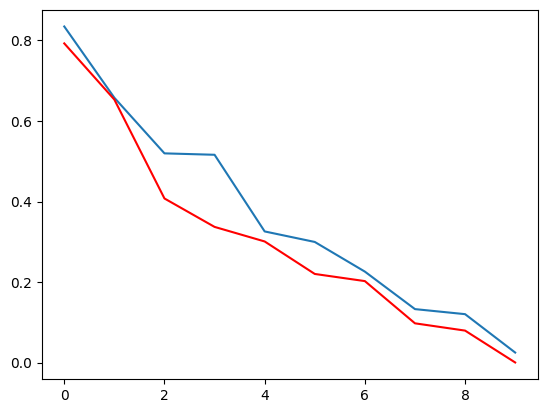

In [228]:
plt.plot(lala)
plt.plot(lala2, color='r')

In [160]:
trial_data_wt_array.shape

(12, 101, 3)

In [106]:
# consider all models, and no thalamus: compute 5D PCA manifolds for each trial, m1, dcn, str and finally all 3 regions
 
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

class_indices = {'WT-M350':1,
                'WT-M355':1, 
                'AS-M351':2,
                'AS-M354':2}
X_data_5 = {'WT':[],'AS':[]}
X_data_m1_5 = {'WT':[],'AS':[]}
X_data_dcn_5 = {'WT':[],'AS':[]}
X_data_str_5 = {'WT':[],'AS':[]}
X = []
y = []

for data_dir in [ data_dir_WTM355]:
    animal_model = data_dir[-17:-10]
    animal_type = data_dir[-17:-15]
    files = os.listdir(data_dir)
    for file_name in [files[4]]:
        print(file_name)
        fpath = os.path.join(data_dir, file_name)
        df = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
        df = pyaldata.select_trials(df, "success == 1")  # only consider successful trials
        
        if len(df)>1:
            df["trial_id"] = range(len(df))
            df = pyaldata.combine_time_bins(df, 5)
            spike_fields = ["m1_spikes","dcn_spikes","str_spikes"]

            for col in spike_fields:
                df = pyaldata.remove_low_firing_neurons(df, col,  1)
            for col in spike_fields:
                df = pyaldata.transform_signal(df, col,  'sqrt')
            df = pyaldata.merge_signals(df, spike_fields, "all_spikes")
            df = pyaldata.add_firing_rates(df, 'smooth')
            df = pyaldata.restrict_to_interval(df, "idx_mo", end_point_name=None, rel_start=-50, rel_end=50)  # consider half a second before and after movement onset

            concat_m1_rates = pyaldata.concat_trials(df, 'str_rates')

            m1_pca_WTM355 = pca.fit_transform(concat_m1_rates)
            



WT-M355_session13.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_23668\3718670176.py:39: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [ 

In [105]:
# consider all models, and no thalamus: compute 5D PCA manifolds for each trial, m1, dcn, str and finally all 3 regions
 
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

class_indices = {'WT-M350':1,
                'WT-M355':1, 
                'AS-M351':2,
                'AS-M354':2}
X_data_5 = {'WT':[],'AS':[]}
X_data_m1_5 = {'WT':[],'AS':[]}
X_data_dcn_5 = {'WT':[],'AS':[]}
X_data_str_5 = {'WT':[],'AS':[]}
X = []
y = []

for data_dir in [ data_dir_ASM351]:
    animal_model = data_dir[-17:-10]
    animal_type = data_dir[-17:-15]
    files = os.listdir(data_dir)
    for file_name in [files[7]]:
        print(file_name)
        fpath = os.path.join(data_dir, file_name)
        df = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
        df = pyaldata.select_trials(df, "success == 1")  # only consider successful trials
        
        if len(df)>1:
            df["trial_id"] = range(len(df))
            df = pyaldata.combine_time_bins(df, 5)
            spike_fields = ["m1_spikes","dcn_spikes","str_spikes"]

            for col in spike_fields:
                df = pyaldata.remove_low_firing_neurons(df, col,  1)
            for col in spike_fields:
                df = pyaldata.transform_signal(df, col,  'sqrt')
            df = pyaldata.merge_signals(df, spike_fields, "all_spikes")
            df = pyaldata.add_firing_rates(df, 'smooth')
            df = pyaldata.restrict_to_interval(df, "idx_mo", end_point_name=None, rel_start=-50, rel_end=50)  # consider half a second before and after movement onset

            concat_m1_rates = pyaldata.concat_trials(df, 'str_rates')

            m1_pca_ASM351 = pca.fit_transform(concat_m1_rates)
            



AS-M351_session8.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_23668\1695269646.py:39: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [1

In [107]:
trial_data_wt = [m1_pca_WTM355[0:101,:],m1_pca_WTM355[101:202,:],m1_pca_WTM355[202:303,:],m1_pca_WTM355[303:404,:],m1_pca_WTM355[404:505,:],m1_pca_WTM355[505:606,:],m1_pca_WTM355[606:707,:],m1_pca_WTM355[707:808,:],m1_pca_WTM355[808:909,:],m1_pca_WTM355[909:1010,:],m1_pca_WTM355[1010:1111,:],m1_pca_WTM355[1111:1212,:]]
trial_data_as = [m1_pca_ASM351[0:101,:],m1_pca_ASM351[101:202,:],m1_pca_ASM351[202:303,:],m1_pca_ASM351[303:404,:],m1_pca_ASM351[404:505,:],m1_pca_ASM351[505:606,:],m1_pca_ASM351[606:707,:],m1_pca_ASM351[707:808,:],m1_pca_ASM351[808:909,:],m1_pca_ASM351[909:1010,:],m1_pca_ASM351[1010:1111,:],m1_pca_ASM351[1111:1212,:]]

In [108]:
# Decoder from 10D PCA m1 activity to type:
import random

random.shuffle(trial_data_wt)
random.shuffle(trial_data_as)


# Step 3: Combine the sampled subsets
X_balanced = np.concatenate((trial_data_wt,trial_data_as))
y_balanced = np.concatenate((['WT'] * 12, ['AS'] * 12))

# Optionally, shuffle the combined dataset
indices = np.arange(len(X_balanced))
np.random.shuffle(indices)
X_balanced = X_balanced[indices]
y_balanced = y_balanced[indices]

X_balanced_reshaped = X_balanced.reshape(len(X_balanced),-1)  # convert to 2d array (needed for the NB classifier)
y_balanced_reshaped = y_balanced.reshape(len(y_balanced),-1)


# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced_reshaped, y_balanced_reshaped, test_size=0.2, random_state=10)


# Initialize Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Train classifier
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)



Accuracy: 0.8


c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [96]:
np.shape(m1_pca_ASM351)

(1717, 10)

In [86]:
# consider all models, and no thalamus: compute 5D PCA manifolds for each trial, m1, dcn, str and finally all 3 regions
 
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

class_indices = {'WT-M350':1,
                'WT-M355':1, 
                'AS-M351':2,
                'AS-M354':2}
X_data_5 = {'WT':[],'AS':[]}
X_data_m1_5 = {'WT':[],'AS':[]}
X_data_dcn_5 = {'WT':[],'AS':[]}
X_data_str_5 = {'WT':[],'AS':[]}
X = []
y = []

for data_dir in [ data_dir_WTM355]:
    animal_model = data_dir[-17:-10]
    animal_type = data_dir[-17:-15]
    files = os.listdir(data_dir)
    for file_name in [files[4]]:
        print(file_name)
        fpath = os.path.join(data_dir, file_name)
        df = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
        df = pyaldata.select_trials(df, "success == 1")  # only consider successful trials
        
        if len(df)>1:
            df["trial_id"] = range(len(df))
            df = pyaldata.combine_time_bins(df, 5)
            spike_fields = ["m1_spikes","dcn_spikes","str_spikes"]

            for col in spike_fields:
                df = pyaldata.remove_low_firing_neurons(df, col,  1)
            for col in spike_fields:
                df = pyaldata.transform_signal(df, col,  'sqrt')
            df = pyaldata.merge_signals(df, spike_fields, "all_spikes")
            df = pyaldata.add_firing_rates(df, 'smooth')
            df = pyaldata.restrict_to_interval(df, "idx_mo", end_point_name=None, rel_start=-50, rel_end=50)  # consider half a second before and after movement onset

            concat_all_rates = pyaldata.concat_trials(df, 'all_rates')
            concat_m1_rates = pyaldata.concat_trials(df,'m1_rates')
            concat_dcn_rates = pyaldata.concat_trials(df,'dcn_rates')
            concat_str_rates = pyaldata.concat_trials(df,'str_rates')

            all_pca_WTM355 = pca.fit_transform(concat_all_rates)
            



WT-M355_session13.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_23668\349464451.py:39: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [ 7

In [29]:
np.shape(all_pca_WTM355)

(4343, 10)

In [30]:
np.shape(concat_all_rates)

(4343, 261)

In [31]:
np.shape(concat_m1_rates)

(4343, 54)

In [51]:
np.shape(concat_dcn_rates)

(4343, 162)

In [52]:
np.shape(concat_str_rates)

(4343, 45)

In [53]:
concat_dcn_rates = concat_dcn_rates[:,:45]

In [54]:
concat_m1_rates = concat_m1_rates[:,:45]

In [55]:
concat_concat = np.vstack([concat_m1_rates, concat_dcn_rates, concat_str_rates])

In [56]:
np.shape(concat_concat)

(13029, 45)

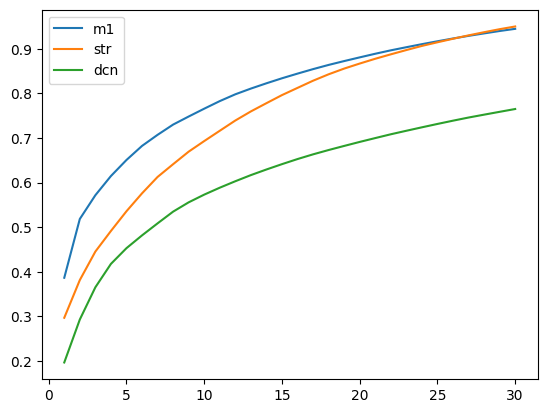

In [87]:
# Apply PCA
pca_model_m1 = PCA(n_components=30)
pca_model_m1.fit(concat_m1_rates)
principal_eigenvectors = pca_model.components_
np.shape(principal_eigenvectors)

plt.plot(range(1,31),np.cumsum(pca_model_m1.explained_variance_ratio_))
pca_model_m1 = PCA(n_components=30)
pca_model_m1.fit(concat_str_rates)
principal_eigenvectors = pca_model.components_
np.shape(principal_eigenvectors)

plt.plot(range(1,31),np.cumsum(pca_model_m1.explained_variance_ratio_))
pca_model_m1 = PCA(n_components=30)
pca_model_m1.fit(concat_dcn_rates)
principal_eigenvectors = pca_model.components_
np.shape(principal_eigenvectors)

plt.plot(range(1,31),np.cumsum(pca_model_m1.explained_variance_ratio_))
plt.legend(['m1','str','dcn'])


In [59]:
m1_projected = pca_model.transform(concat_m1_rates)

In [60]:
np.shape(m1_projected)

(4343, 3)

In [61]:
dcn_projected = pca_model.transform(concat_dcn_rates)
str_projected = pca_model.transform(concat_str_rates)

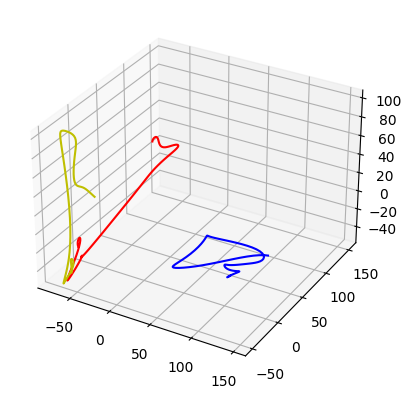

In [229]:
pc1 = m1_projected[0:101,0]
pc2 = m1_projected[0:101,1]
pc3 = m1_projected[0:101,2]

pc11 = dcn_projected[0:101,0]
pc21 = dcn_projected[0:101,1]
pc31 = dcn_projected[0:101,2]

pc12 = str_projected[0:101,0]
pc22 = str_projected[0:101,1]
pc32 = str_projected[0:101,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(pc1,pc2,pc3,color="r")
ax.plot(pc11,pc21,pc31,color='b')
ax.plot(pc12,pc22,pc32,color='y')
plt.show()

In [88]:
# consider all models, and no thalamus: compute 5D PCA manifolds for each trial, m1, dcn, str and finally all 3 regions
 
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

class_indices = {'WT-M350':1,
                'WT-M355':1, 
                'AS-M351':2,
                'AS-M354':2}
X_data_5 = {'WT':[],'AS':[]}
X_data_m1_5 = {'WT':[],'AS':[]}
X_data_dcn_5 = {'WT':[],'AS':[]}
X_data_str_5 = {'WT':[],'AS':[]}
X = []
y = []

for data_dir in [ data_dir_ASM354]:
    animal_model = data_dir[-17:-10]
    animal_type = data_dir[-17:-15]
    files = os.listdir(data_dir)
    for file_name in [files[7]]:
        print(file_name)
        fpath = os.path.join(data_dir, file_name)
        df = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
        df = pyaldata.select_trials(df, "success == 1")  # only consider successful trials
        
        if len(df)>1:
            df["trial_id"] = range(len(df))
            df = pyaldata.combine_time_bins(df, 5)
            spike_fields = ["m1_spikes","dcn_spikes","str_spikes"]

            for col in spike_fields:
                df = pyaldata.remove_low_firing_neurons(df, col,  1)
            for col in spike_fields:
                df = pyaldata.transform_signal(df, col,  'sqrt')
            df = pyaldata.merge_signals(df, spike_fields, "all_spikes")
            df = pyaldata.add_firing_rates(df, 'smooth')
            df = pyaldata.restrict_to_interval(df, "idx_mo", end_point_name=None, rel_start=-50, rel_end=50)  # consider half a second before and after movement onset

            concat_all_rates = pyaldata.concat_trials(df, 'all_rates')
            concat_m1_rates = pyaldata.concat_trials(df,'m1_rates')
            concat_dcn_rates = pyaldata.concat_trials(df,'dcn_rates')
            concat_str_rates = pyaldata.concat_trials(df,'str_rates')

            all_pca_WTM355 = pca.fit_transform(concat_all_rates)
            



AS-M354_session8.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


In [69]:
np.shape(concat_m1_rates)

(1717, 46)

In [70]:
np.shape(concat_dcn_rates)

(1717, 176)

In [71]:
np.shape(concat_str_rates)

(1717, 32)

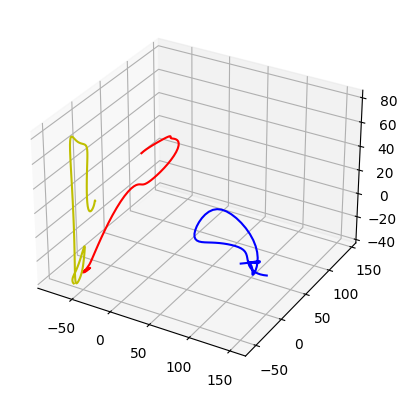

In [90]:
concat_m1_rates = concat_m1_rates[:,:32]
concat_dcn_rates = concat_dcn_rates[:,:32]
concat_str_rates = concat_str_rates[:,:32]
concat_concat = np.vstack([concat_m1_rates, concat_dcn_rates, concat_str_rates])

# Apply PCA
pca_model = PCA(n_components=3)
pca_model.fit(concat_concat)
principal_eigenvectors = pca_model.components_
np.shape(principal_eigenvectors)

m1_projected = pca_model.transform(concat_m1_rates)

dcn_projected = pca_model.transform(concat_dcn_rates)
str_projected = pca_model.transform(concat_str_rates)

pc1 = m1_projected[101:202,0]
pc2 = m1_projected[101:202,1]
pc3 = m1_projected[101:202,2]

pc11 = dcn_projected[101:202,0]
pc21 = dcn_projected[101:202,1]
pc31 = dcn_projected[101:202,2]

pc12 = str_projected[101:202,0]
pc22 = str_projected[101:202,1]
pc32 = str_projected[101:202,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(pc1,pc2,pc3,color="r")
ax.plot(pc11,pc21,pc31,color='b')
ax.plot(pc12,pc22,pc32,color='y')
plt.show()

AS-M354_session1.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


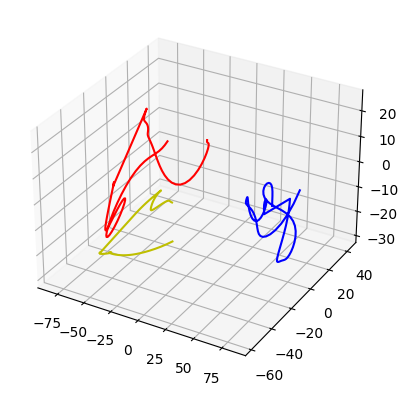

AS-M354_session2.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


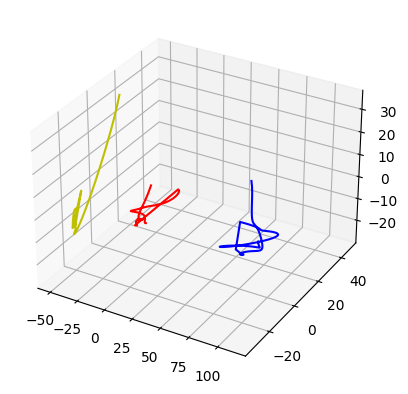

AS-M354_session3.mat
AS-M354_session4.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


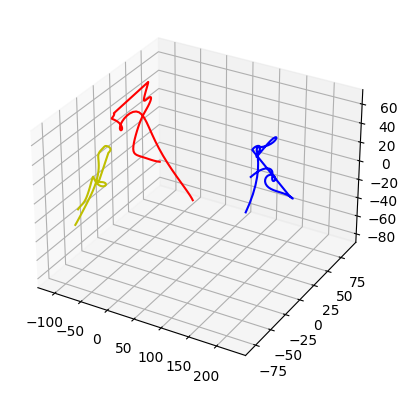

AS-M354_session5.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


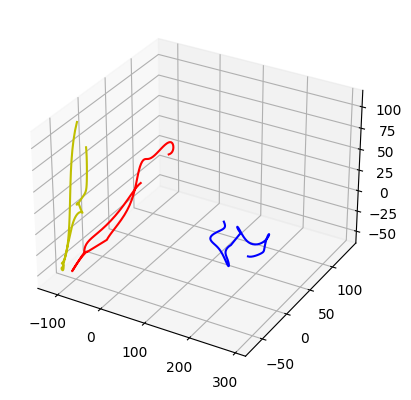

AS-M354_session6.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


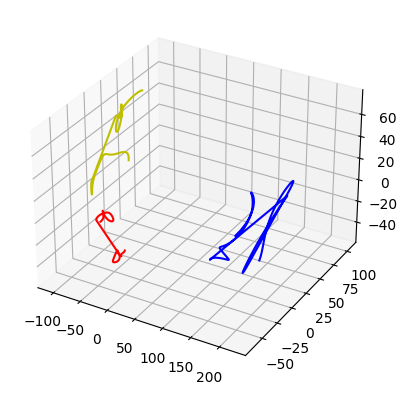

AS-M354_session7.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


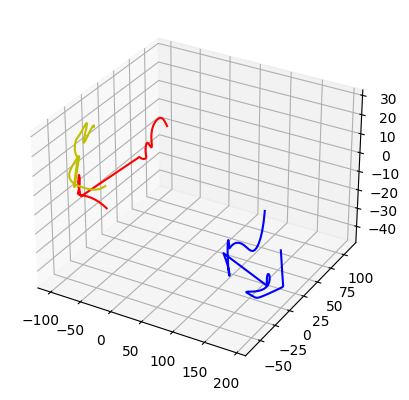

AS-M354_session8.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


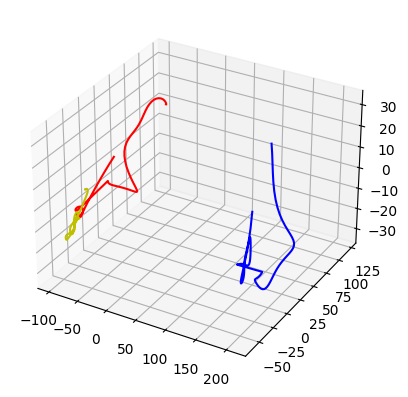

In [245]:
# consider all models, and no thalamus: compute 5D PCA manifolds for each trial, m1, dcn, str and finally all 3 regions
 
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

class_indices = {'WT-M350':1,
                'WT-M355':1, 
                'AS-M351':2,
                'AS-M354':2}
X_data_5 = {'WT':[],'AS':[]}
X_data_m1_5 = {'WT':[],'AS':[]}
X_data_dcn_5 = {'WT':[],'AS':[]}
X_data_str_5 = {'WT':[],'AS':[]}
X = []
y = []

for data_dir in [ data_dir_ASM354]:
    animal_model = data_dir[-17:-10]
    animal_type = data_dir[-17:-15]
    files = os.listdir(data_dir)
    for file_name in files:
        print(file_name)
        fpath = os.path.join(data_dir, file_name)
        df = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
        df = pyaldata.select_trials(df, "success == 1")  # only consider successful trials
        
        if len(df)>1:
            df["trial_id"] = range(len(df))
            df = pyaldata.combine_time_bins(df, 5)
            spike_fields = ["m1_spikes","dcn_spikes","str_spikes"]

            for col in spike_fields:
                df = pyaldata.remove_low_firing_neurons(df, col,  1)
            for col in spike_fields:
                df = pyaldata.transform_signal(df, col,  'sqrt')
            df = pyaldata.merge_signals(df, spike_fields, "all_spikes")
            df = pyaldata.add_firing_rates(df, 'smooth')
            df = pyaldata.restrict_to_interval(df, "idx_mo", end_point_name=None, rel_start=-50, rel_end=100)  # consider half a second before and after movement onset

            concat_all_rates = pyaldata.concat_trials(df, 'all_rates')
            concat_m1_rates = pyaldata.concat_trials(df,'m1_rates')
            concat_dcn_rates = pyaldata.concat_trials(df,'dcn_rates')
            concat_str_rates = pyaldata.concat_trials(df,'str_rates')

            all_pca_WTM355 = pca.fit_transform(concat_all_rates)
            

            min_size = min([np.shape(concat_m1_rates)[1], np.shape(concat_dcn_rates)[1], np.shape(concat_str_rates)[1]])

            concat_m1_rates = concat_m1_rates[:,:min_size]
            concat_dcn_rates = concat_dcn_rates[:,:min_size]
            concat_str_rates = concat_str_rates[:,:min_size]
            concat_concat = np.vstack([concat_m1_rates, concat_dcn_rates, concat_str_rates])

            # Apply PCA
            pca_model = PCA(n_components=3)
            pca_model.fit(concat_concat)
            principal_eigenvectors = pca_model.components_
            np.shape(principal_eigenvectors)

            m1_projected = pca_model.transform(concat_m1_rates)

            dcn_projected = pca_model.transform(concat_dcn_rates)
            str_projected = pca_model.transform(concat_str_rates)

            pc1 = m1_projected[101:202,0]
            pc2 = m1_projected[101:202,1]
            pc3 = m1_projected[101:202,2]

            pc11 = dcn_projected[101:202,0]
            pc21 = dcn_projected[101:202,1]
            pc31 = dcn_projected[101:202,2]

            pc12 = str_projected[101:202,0]
            pc22 = str_projected[101:202,1]
            pc32 = str_projected[101:202,2]

            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.plot(pc1,pc2,pc3,color="r")
            ax.plot(pc11,pc21,pc31,color='b')
            ax.plot(pc12,pc22,pc32,color='y')
            plt.show()



WT-M350_session1.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


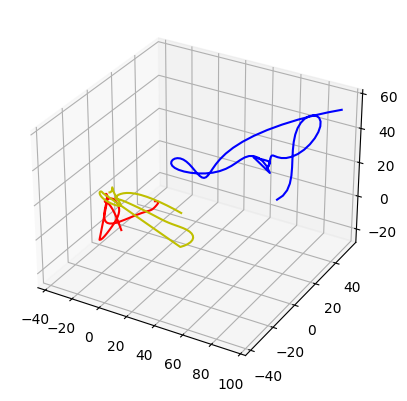

WT-M350_session2.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


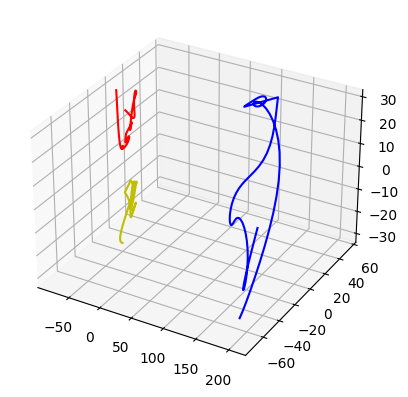

WT-M350_session3.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


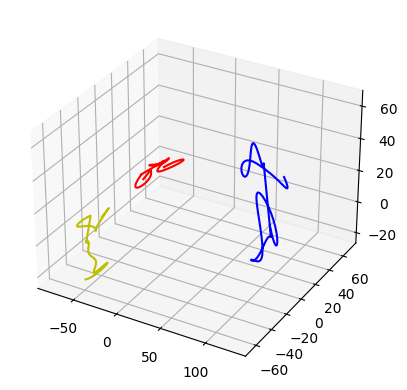

WT-M350_session4.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


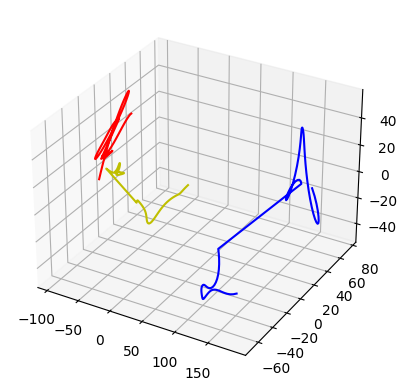

WT-M350_session5.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


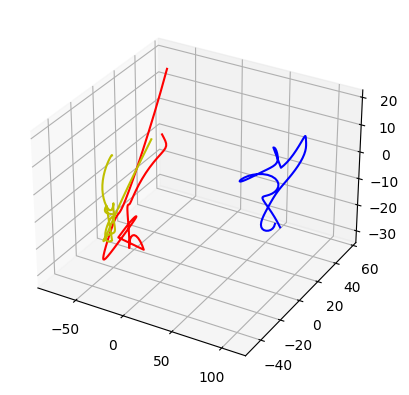

WT-M350_session6.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


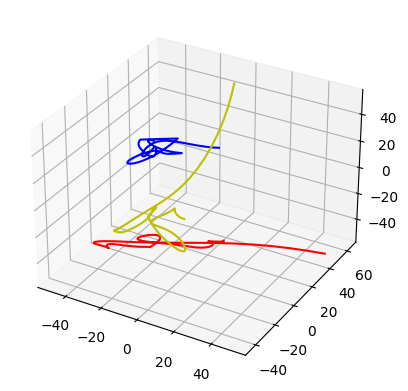

WT-M350_session7.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


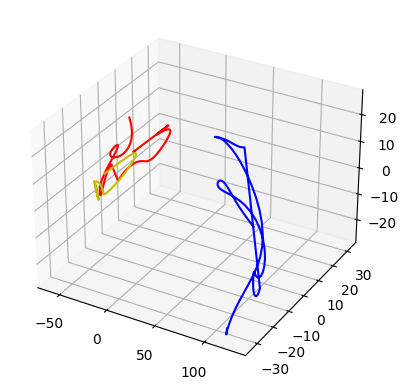

WT-M350_session8.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


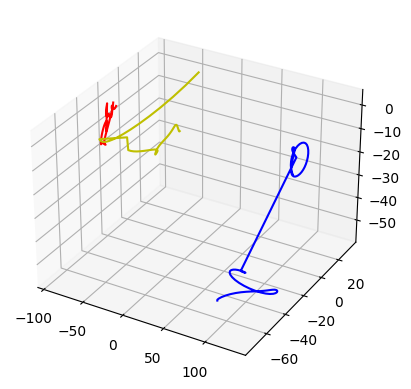

In [244]:
# consider all models, and no thalamus: compute 5D PCA manifolds for each trial, m1, dcn, str and finally all 3 regions
 
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

class_indices = {'WT-M350':1,
                'WT-M355':1, 
                'AS-M351':2,
                'AS-M354':2}
X_data_5 = {'WT':[],'AS':[]}
X_data_m1_5 = {'WT':[],'AS':[]}
X_data_dcn_5 = {'WT':[],'AS':[]}
X_data_str_5 = {'WT':[],'AS':[]}
X = []
y = []

for data_dir in [ data_dir_WTM350]:
    animal_model = data_dir[-17:-10]
    animal_type = data_dir[-17:-15]
    files = os.listdir(data_dir)
    for file_name in files:
        print(file_name)
        fpath = os.path.join(data_dir, file_name)
        df = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
        df = pyaldata.select_trials(df, "success == 1")  # only consider successful trials
        
        if len(df)>1:
            df["trial_id"] = range(len(df))
            df = pyaldata.combine_time_bins(df, 5)
            spike_fields = ["m1_spikes","dcn_spikes","str_spikes"]

            for col in spike_fields:
                df = pyaldata.remove_low_firing_neurons(df, col,  1)
            for col in spike_fields:
                df = pyaldata.transform_signal(df, col,  'sqrt')
            df = pyaldata.merge_signals(df, spike_fields, "all_spikes")
            df = pyaldata.add_firing_rates(df, 'smooth')
            df = pyaldata.restrict_to_interval(df, "idx_mo", end_point_name=None, rel_start=-50, rel_end=100)  # consider half a second before and after movement onset

            concat_all_rates = pyaldata.concat_trials(df, 'all_rates')
            concat_m1_rates = pyaldata.concat_trials(df,'m1_rates')
            concat_dcn_rates = pyaldata.concat_trials(df,'dcn_rates')
            concat_str_rates = pyaldata.concat_trials(df,'str_rates')

            all_pca_WTM355 = pca.fit_transform(concat_all_rates)
            

            min_size = min([np.shape(concat_m1_rates)[1], np.shape(concat_dcn_rates)[1], np.shape(concat_str_rates)[1]])

            concat_m1_rates = concat_m1_rates[:,:min_size]
            concat_dcn_rates = concat_dcn_rates[:,:min_size]
            concat_str_rates = concat_str_rates[:,:min_size]
            concat_concat = np.vstack([concat_m1_rates, concat_dcn_rates, concat_str_rates])

            # Apply PCA
            pca_model = PCA(n_components=3)
            pca_model.fit(concat_concat)
            principal_eigenvectors = pca_model.components_
            np.shape(principal_eigenvectors)

            m1_projected = pca_model.transform(concat_m1_rates)

            dcn_projected = pca_model.transform(concat_dcn_rates)
            str_projected = pca_model.transform(concat_str_rates)

            pc1 = m1_projected[101:202,0]
            pc2 = m1_projected[101:202,1]
            pc3 = m1_projected[101:202,2]

            pc11 = dcn_projected[101:202,0]
            pc21 = dcn_projected[101:202,1]
            pc31 = dcn_projected[101:202,2]

            pc12 = str_projected[101:202,0]
            pc22 = str_projected[101:202,1]
            pc32 = str_projected[101:202,2]

            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.plot(pc1,pc2,pc3,color="r")
            ax.plot(pc11,pc21,pc31,color='b')
            ax.plot(pc12,pc22,pc32,color='y')
            plt.show()



WT-M355_session1.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


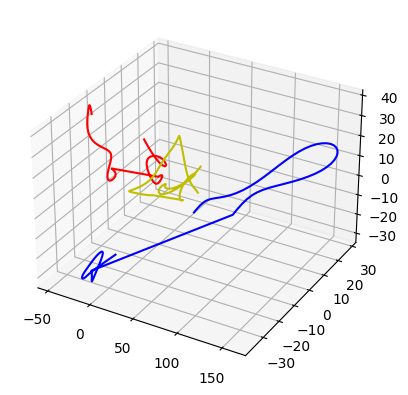

WT-M355_session10.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_23668\4207849303.py:39: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [1

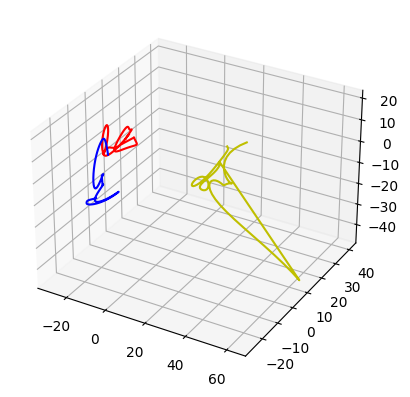

WT-M355_session11.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


WT-M355_session12.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_23668\4207849303.py:39: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [3

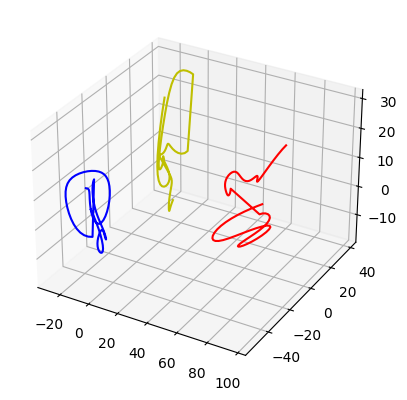

WT-M355_session13.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_23668\4207849303.py:39: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [ 

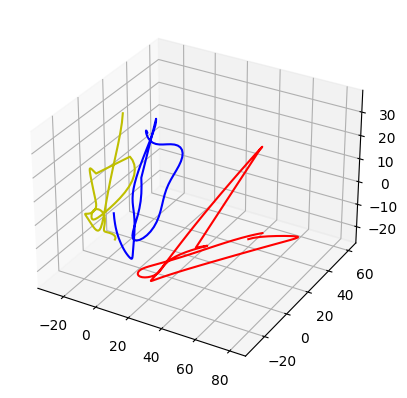

WT-M355_session14.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_23668\4207849303.py:39: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [1

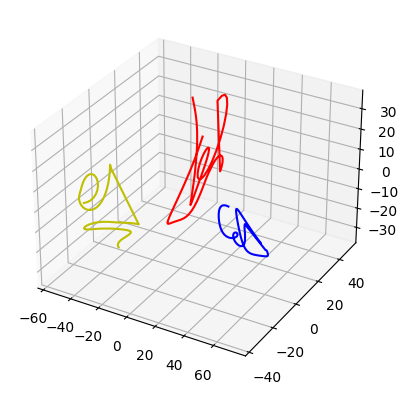

WT-M355_session15.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_23668\4207849303.py:39: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [6

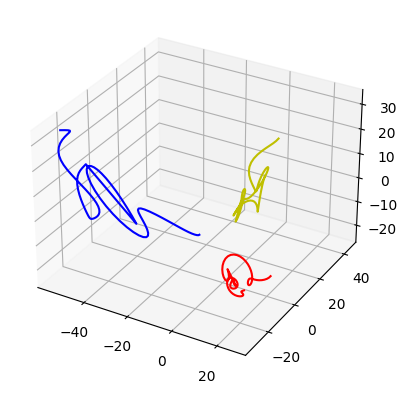

WT-M355_session16.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


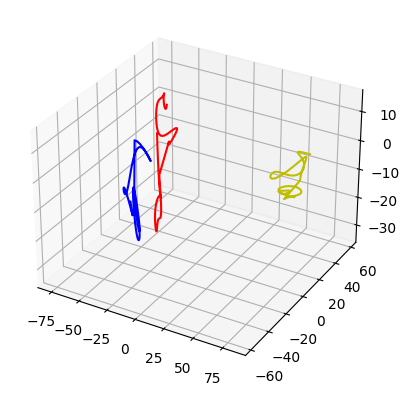

WT-M355_session17.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


WT-M355_session18.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_23668\4207849303.py:39: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [1

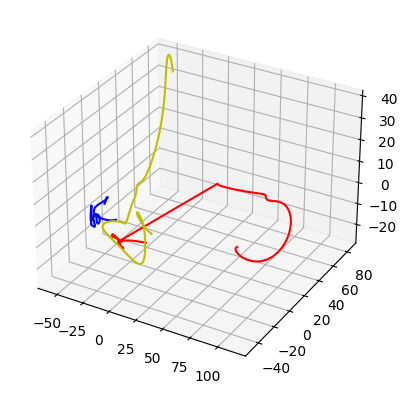

WT-M355_session19.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_23668\4207849303.py:39: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [4

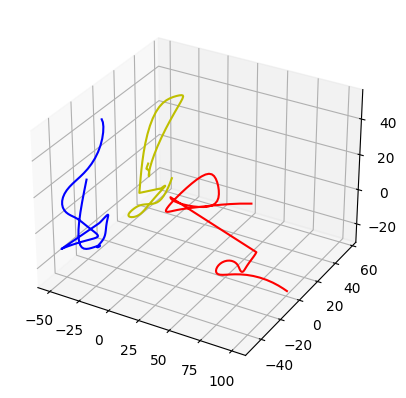

WT-M355_session2.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


WT-M355_session20.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


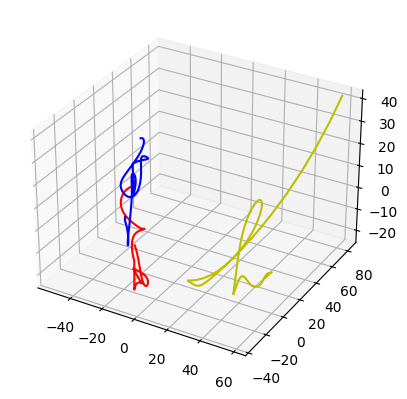

WT-M355_session21.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


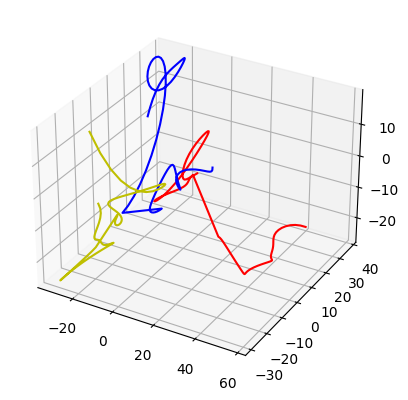

WT-M355_session23.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


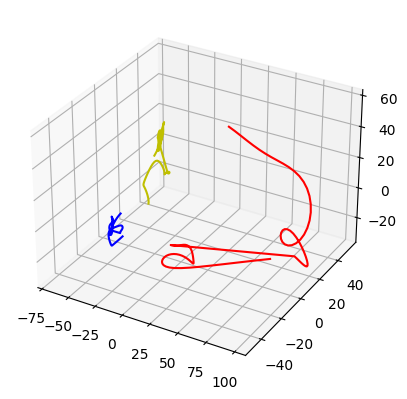

WT-M355_session3.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


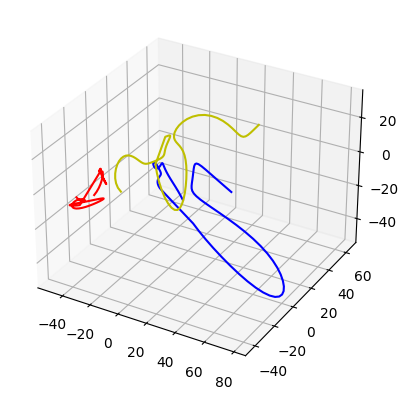

WT-M355_session4.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_23668\4207849303.py:39: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [3

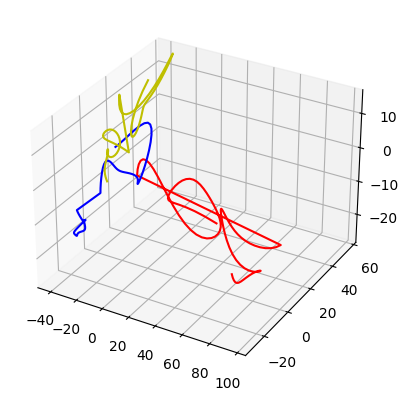

WT-M355_session5.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_23668\4207849303.py:39: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [3

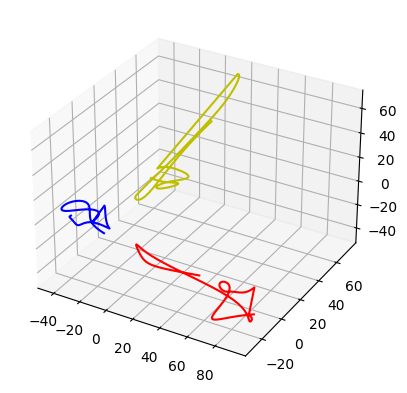

WT-M355_session6.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_23668\4207849303.py:39: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [1

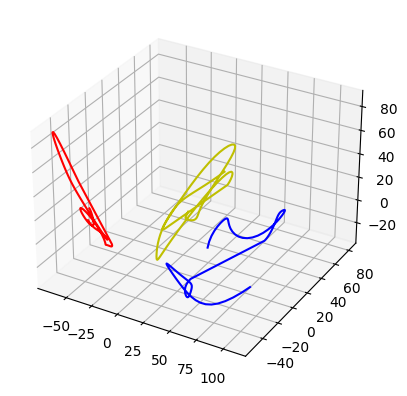

WT-M355_session7.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_23668\4207849303.py:39: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [1

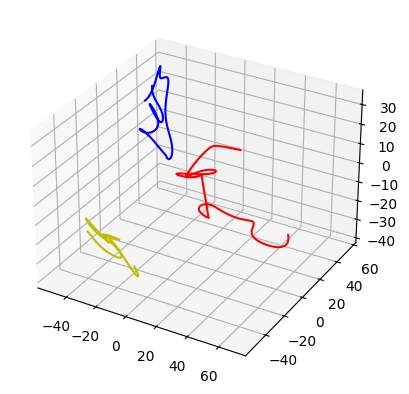

WT-M355_session8.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


WT-M355_session9.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_23668\4207849303.py:39: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [1

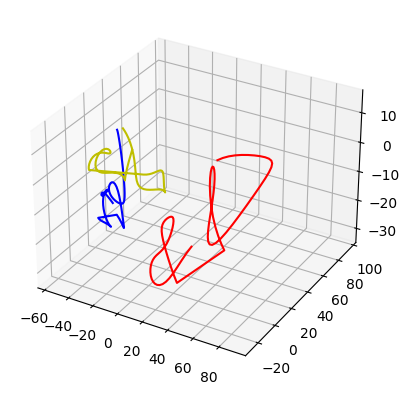

In [248]:
# consider all models, and no thalamus: compute 5D PCA manifolds for each trial, m1, dcn, str and finally all 3 regions
 
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

class_indices = {'WT-M350':1,
                'WT-M355':1, 
                'AS-M351':2,
                'AS-M354':2}
X_data_5 = {'WT':[],'AS':[]}
X_data_m1_5 = {'WT':[],'AS':[]}
X_data_dcn_5 = {'WT':[],'AS':[]}
X_data_str_5 = {'WT':[],'AS':[]}
X = []
y = []

for data_dir in [ data_dir_WTM355]:
    animal_model = data_dir[-17:-10]
    animal_type = data_dir[-17:-15]
    files = os.listdir(data_dir)
    for file_name in files:
        print(file_name)
        fpath = os.path.join(data_dir, file_name)
        df = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
        df = pyaldata.select_trials(df, "success == 1")  # only consider successful trials
        
        if len(df)>1:
            df["trial_id"] = range(len(df))
            df = pyaldata.combine_time_bins(df, 5)
            spike_fields = ["m1_spikes","dcn_spikes","str_spikes"]

            for col in spike_fields:
                df = pyaldata.remove_low_firing_neurons(df, col,  1)
            for col in spike_fields:
                df = pyaldata.transform_signal(df, col,  'sqrt')
            df = pyaldata.merge_signals(df, spike_fields, "all_spikes")
            df = pyaldata.add_firing_rates(df, 'smooth')
            df = pyaldata.restrict_to_interval(df, "idx_mo", end_point_name=None, rel_start=-50, rel_end=100)  # consider half a second before and after movement onset

            concat_all_rates = pyaldata.concat_trials(df, 'all_rates')
            concat_m1_rates = pyaldata.concat_trials(df,'m1_rates')
            concat_dcn_rates = pyaldata.concat_trials(df,'dcn_rates')
            concat_str_rates = pyaldata.concat_trials(df,'str_rates')

            all_pca_WTM355 = pca.fit_transform(concat_all_rates)
            

            min_size = min([np.shape(concat_m1_rates)[1], np.shape(concat_dcn_rates)[1], np.shape(concat_str_rates)[1]])
            if min_size>=15:

                concat_m1_rates = concat_m1_rates[:,:min_size]
                concat_dcn_rates = concat_dcn_rates[:,:min_size]
                concat_str_rates = concat_str_rates[:,:min_size]
                concat_concat = np.vstack([concat_m1_rates, concat_dcn_rates, concat_str_rates])

                # Apply PCA
                pca_model = PCA(n_components=3)
                pca_model.fit(concat_concat)
                principal_eigenvectors = pca_model.components_
                np.shape(principal_eigenvectors)

                m1_projected = pca_model.transform(concat_m1_rates)

                dcn_projected = pca_model.transform(concat_dcn_rates)
                str_projected = pca_model.transform(concat_str_rates)

                pc1 = m1_projected[101:202,0]
                pc2 = m1_projected[101:202,1]
                pc3 = m1_projected[101:202,2]

                pc11 = dcn_projected[101:202,0]
                pc21 = dcn_projected[101:202,1]
                pc31 = dcn_projected[101:202,2]

                pc12 = str_projected[101:202,0]
                pc22 = str_projected[101:202,1]
                pc32 = str_projected[101:202,2]

                fig = plt.figure()
                ax = fig.add_subplot(111, projection='3d')
                ax.plot(pc1,pc2,pc3,color="r")
                ax.plot(pc11,pc21,pc31,color='b')
                ax.plot(pc12,pc22,pc32,color='y')
                plt.show()



AS-M351_session1.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


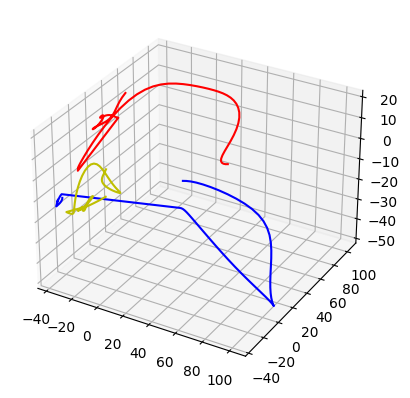

AS-M351_session2.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


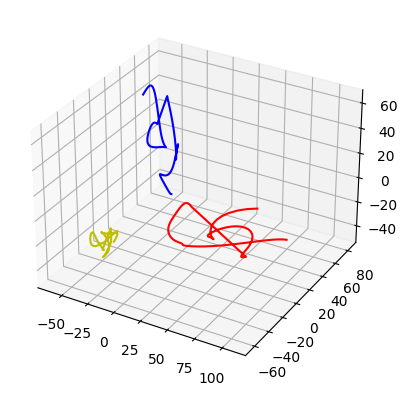

AS-M351_session3.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


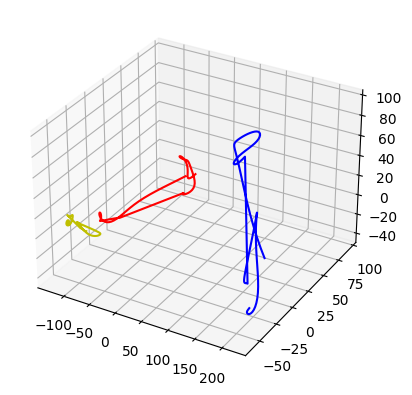

AS-M351_session4.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_23668\3587870414.py:39: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [1

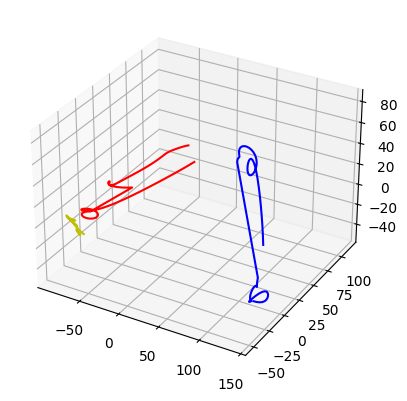

AS-M351_session5.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_23668\3587870414.py:39: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [3

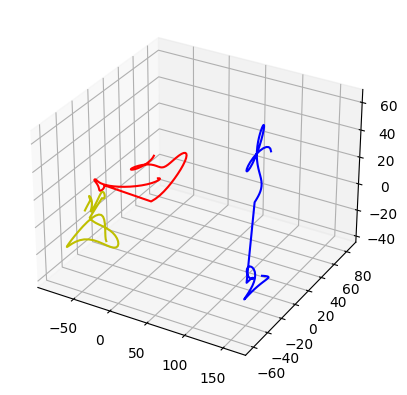

AS-M351_session6.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


AS-M351_session7.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


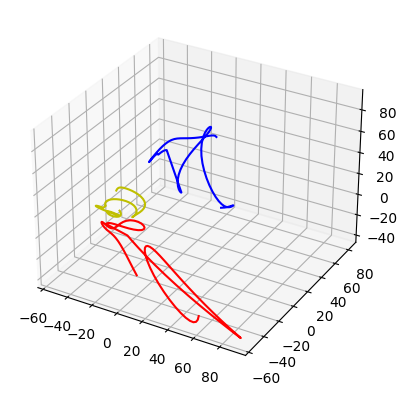

AS-M351_session8.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_23668\3587870414.py:39: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [1

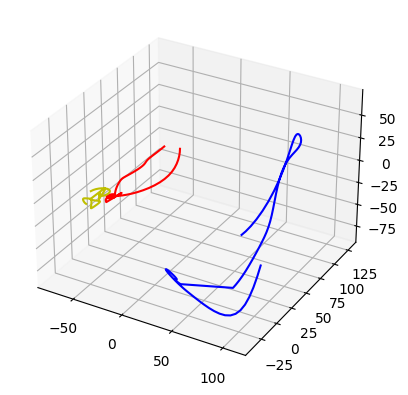

In [249]:
# consider all models, and no thalamus: compute 5D PCA manifolds for each trial, m1, dcn, str and finally all 3 regions
 
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

class_indices = {'WT-M350':1,
                'WT-M355':1, 
                'AS-M351':2,
                'AS-M354':2}
X_data_5 = {'WT':[],'AS':[]}
X_data_m1_5 = {'WT':[],'AS':[]}
X_data_dcn_5 = {'WT':[],'AS':[]}
X_data_str_5 = {'WT':[],'AS':[]}
X = []
y = []

for data_dir in [ data_dir_ASM351]:
    animal_model = data_dir[-17:-10]
    animal_type = data_dir[-17:-15]
    files = os.listdir(data_dir)
    for file_name in files:
        print(file_name)
        fpath = os.path.join(data_dir, file_name)
        df = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
        df = pyaldata.select_trials(df, "success == 1")  # only consider successful trials
        
        if len(df)>1:
            df["trial_id"] = range(len(df))
            df = pyaldata.combine_time_bins(df, 5)
            spike_fields = ["m1_spikes","dcn_spikes","str_spikes"]

            for col in spike_fields:
                df = pyaldata.remove_low_firing_neurons(df, col,  1)
            for col in spike_fields:
                df = pyaldata.transform_signal(df, col,  'sqrt')
            df = pyaldata.merge_signals(df, spike_fields, "all_spikes")
            df = pyaldata.add_firing_rates(df, 'smooth')
            df = pyaldata.restrict_to_interval(df, "idx_mo", end_point_name=None, rel_start=-50, rel_end=100)  # consider half a second before and after movement onset

            concat_all_rates = pyaldata.concat_trials(df, 'all_rates')
            concat_m1_rates = pyaldata.concat_trials(df,'m1_rates')
            concat_dcn_rates = pyaldata.concat_trials(df,'dcn_rates')
            concat_str_rates = pyaldata.concat_trials(df,'str_rates')

            all_pca_WTM355 = pca.fit_transform(concat_all_rates)
            

            min_size = min([np.shape(concat_m1_rates)[1], np.shape(concat_dcn_rates)[1], np.shape(concat_str_rates)[1]])
            if min_size>=15:

                concat_m1_rates = concat_m1_rates[:,:min_size]
                concat_dcn_rates = concat_dcn_rates[:,:min_size]
                concat_str_rates = concat_str_rates[:,:min_size]
                concat_concat = np.vstack([concat_m1_rates, concat_dcn_rates, concat_str_rates])

                # Apply PCA
                pca_model = PCA(n_components=3)
                pca_model.fit(concat_concat)
                principal_eigenvectors = pca_model.components_
                np.shape(principal_eigenvectors)

                m1_projected = pca_model.transform(concat_m1_rates)

                dcn_projected = pca_model.transform(concat_dcn_rates)
                str_projected = pca_model.transform(concat_str_rates)

                pc1 = m1_projected[101:202,0]
                pc2 = m1_projected[101:202,1]
                pc3 = m1_projected[101:202,2]

                pc11 = dcn_projected[101:202,0]
                pc21 = dcn_projected[101:202,1]
                pc31 = dcn_projected[101:202,2]

                pc12 = str_projected[101:202,0]
                pc22 = str_projected[101:202,1]
                pc32 = str_projected[101:202,2]

                fig = plt.figure()
                ax = fig.add_subplot(111, projection='3d')
                ax.plot(pc1,pc2,pc3,color="r")
                ax.plot(pc11,pc21,pc31,color='b')
                ax.plot(pc12,pc22,pc32,color='y')
                plt.show()



AS-M354_session1.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


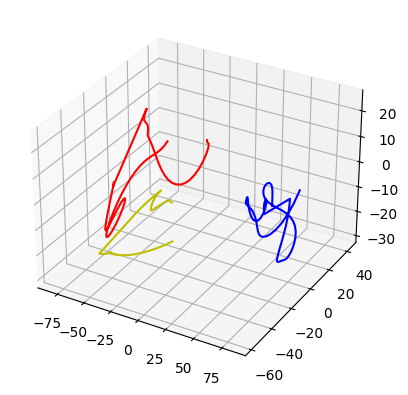

AS-M354_session2.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


AS-M354_session3.mat
AS-M354_session4.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


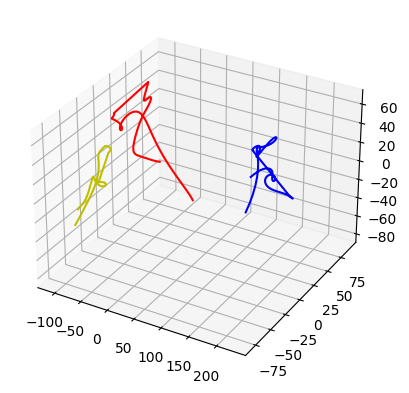

AS-M354_session5.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


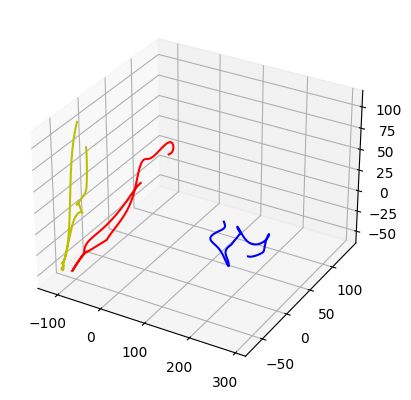

AS-M354_session6.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


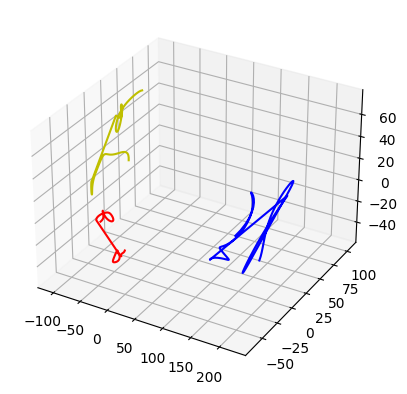

AS-M354_session7.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


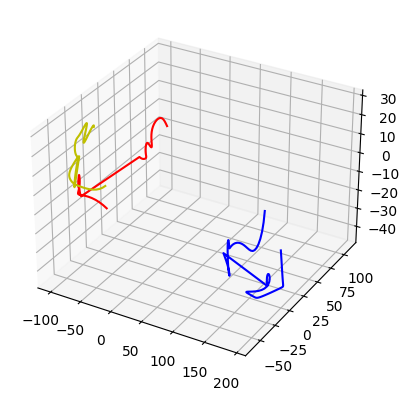

AS-M354_session8.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


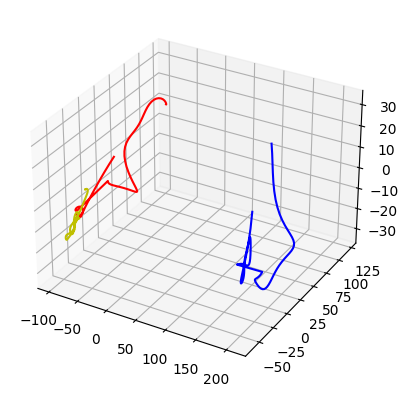

In [250]:
# consider all models, and no thalamus: compute 5D PCA manifolds for each trial, m1, dcn, str and finally all 3 regions
 
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

class_indices = {'WT-M350':1,
                'WT-M355':1, 
                'AS-M351':2,
                'AS-M354':2}
X_data_5 = {'WT':[],'AS':[]}
X_data_m1_5 = {'WT':[],'AS':[]}
X_data_dcn_5 = {'WT':[],'AS':[]}
X_data_str_5 = {'WT':[],'AS':[]}
X = []
y = []

for data_dir in [ data_dir_ASM354]:
    animal_model = data_dir[-17:-10]
    animal_type = data_dir[-17:-15]
    files = os.listdir(data_dir)
    for file_name in files:
        print(file_name)
        fpath = os.path.join(data_dir, file_name)
        df = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
        df = pyaldata.select_trials(df, "success == 1")  # only consider successful trials
        
        if len(df)>1:
            df["trial_id"] = range(len(df))
            df = pyaldata.combine_time_bins(df, 5)
            spike_fields = ["m1_spikes","dcn_spikes","str_spikes"]

            for col in spike_fields:
                df = pyaldata.remove_low_firing_neurons(df, col,  1)
            for col in spike_fields:
                df = pyaldata.transform_signal(df, col,  'sqrt')
            df = pyaldata.merge_signals(df, spike_fields, "all_spikes")
            df = pyaldata.add_firing_rates(df, 'smooth')
            df = pyaldata.restrict_to_interval(df, "idx_mo", end_point_name=None, rel_start=-50, rel_end=100)  # consider half a second before and after movement onset

            concat_all_rates = pyaldata.concat_trials(df, 'all_rates')
            concat_m1_rates = pyaldata.concat_trials(df,'m1_rates')
            concat_dcn_rates = pyaldata.concat_trials(df,'dcn_rates')
            concat_str_rates = pyaldata.concat_trials(df,'str_rates')

            all_pca_WTM355 = pca.fit_transform(concat_all_rates)
            

            min_size = min([np.shape(concat_m1_rates)[1], np.shape(concat_dcn_rates)[1], np.shape(concat_str_rates)[1]])
            if min_size>=15:

                concat_m1_rates = concat_m1_rates[:,:min_size]
                concat_dcn_rates = concat_dcn_rates[:,:min_size]
                concat_str_rates = concat_str_rates[:,:min_size]
                concat_concat = np.vstack([concat_m1_rates, concat_dcn_rates, concat_str_rates])

                # Apply PCA
                pca_model = PCA(n_components=3)
                pca_model.fit(concat_concat)
                principal_eigenvectors = pca_model.components_
                np.shape(principal_eigenvectors)

                m1_projected = pca_model.transform(concat_m1_rates)

                dcn_projected = pca_model.transform(concat_dcn_rates)
                str_projected = pca_model.transform(concat_str_rates)

                pc1 = m1_projected[101:202,0]
                pc2 = m1_projected[101:202,1]
                pc3 = m1_projected[101:202,2]

                pc11 = dcn_projected[101:202,0]
                pc21 = dcn_projected[101:202,1]
                pc31 = dcn_projected[101:202,2]

                pc12 = str_projected[101:202,0]
                pc22 = str_projected[101:202,1]
                pc32 = str_projected[101:202,2]

                fig = plt.figure()
                ax = fig.add_subplot(111, projection='3d')
                ax.plot(pc1,pc2,pc3,color="r")
                ax.plot(pc11,pc21,pc31,color='b')
                ax.plot(pc12,pc22,pc32,color='y')
                plt.show()



WT-M350_session1.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


WT-M350_session2.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


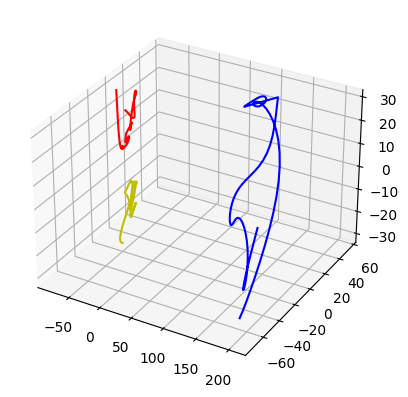

WT-M350_session3.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


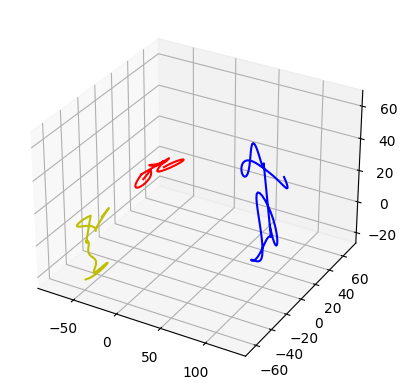

WT-M350_session4.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


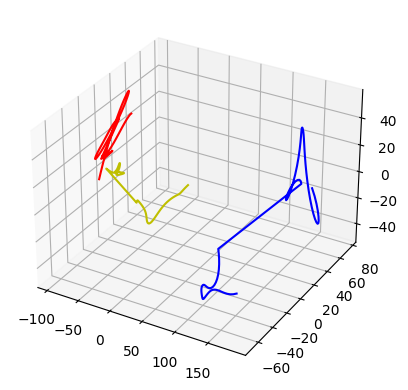

WT-M350_session5.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


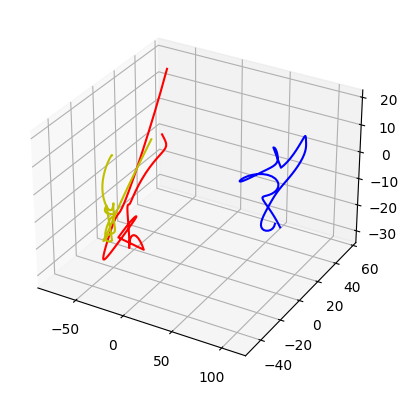

WT-M350_session6.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


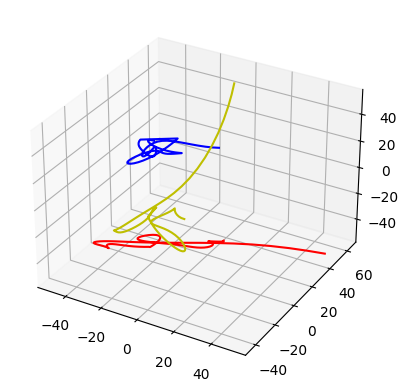

WT-M350_session7.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


WT-M350_session8.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


In [251]:
# consider all models, and no thalamus: compute 5D PCA manifolds for each trial, m1, dcn, str and finally all 3 regions
 
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

class_indices = {'WT-M350':1,
                'WT-M355':1, 
                'AS-M351':2,
                'AS-M354':2}
X_data_5 = {'WT':[],'AS':[]}
X_data_m1_5 = {'WT':[],'AS':[]}
X_data_dcn_5 = {'WT':[],'AS':[]}
X_data_str_5 = {'WT':[],'AS':[]}
X = []
y = []

for data_dir in [ data_dir_WTM350]:
    animal_model = data_dir[-17:-10]
    animal_type = data_dir[-17:-15]
    files = os.listdir(data_dir)
    for file_name in files:
        print(file_name)
        fpath = os.path.join(data_dir, file_name)
        df = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
        df = pyaldata.select_trials(df, "success == 1")  # only consider successful trials
        
        if len(df)>1:
            df["trial_id"] = range(len(df))
            df = pyaldata.combine_time_bins(df, 5)
            spike_fields = ["m1_spikes","dcn_spikes","str_spikes"]

            for col in spike_fields:
                df = pyaldata.remove_low_firing_neurons(df, col,  1)
            for col in spike_fields:
                df = pyaldata.transform_signal(df, col,  'sqrt')
            df = pyaldata.merge_signals(df, spike_fields, "all_spikes")
            df = pyaldata.add_firing_rates(df, 'smooth')
            df = pyaldata.restrict_to_interval(df, "idx_mo", end_point_name=None, rel_start=-50, rel_end=100)  # consider half a second before and after movement onset

            concat_all_rates = pyaldata.concat_trials(df, 'all_rates')
            concat_m1_rates = pyaldata.concat_trials(df,'m1_rates')
            concat_dcn_rates = pyaldata.concat_trials(df,'dcn_rates')
            concat_str_rates = pyaldata.concat_trials(df,'str_rates')

            all_pca_WTM355 = pca.fit_transform(concat_all_rates)
            

            min_size = min([np.shape(concat_m1_rates)[1], np.shape(concat_dcn_rates)[1], np.shape(concat_str_rates)[1]])
            if min_size>=15:

                concat_m1_rates = concat_m1_rates[:,:min_size]
                concat_dcn_rates = concat_dcn_rates[:,:min_size]
                concat_str_rates = concat_str_rates[:,:min_size]
                concat_concat = np.vstack([concat_m1_rates, concat_dcn_rates, concat_str_rates])

                # Apply PCA
                pca_model = PCA(n_components=3)
                pca_model.fit(concat_concat)
                principal_eigenvectors = pca_model.components_
                np.shape(principal_eigenvectors)

                m1_projected = pca_model.transform(concat_m1_rates)

                dcn_projected = pca_model.transform(concat_dcn_rates)
                str_projected = pca_model.transform(concat_str_rates)

                pc1 = m1_projected[101:202,0]
                pc2 = m1_projected[101:202,1]
                pc3 = m1_projected[101:202,2]

                pc11 = dcn_projected[101:202,0]
                pc21 = dcn_projected[101:202,1]
                pc31 = dcn_projected[101:202,2]

                pc12 = str_projected[101:202,0]
                pc22 = str_projected[101:202,1]
                pc32 = str_projected[101:202,2]

                fig = plt.figure()
                ax = fig.add_subplot(111, projection='3d')
                ax.plot(pc1,pc2,pc3,color="r")
                ax.plot(pc11,pc21,pc31,color='b')
                ax.plot(pc12,pc22,pc32,color='y')
                plt.show()



AS-M351_session1.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


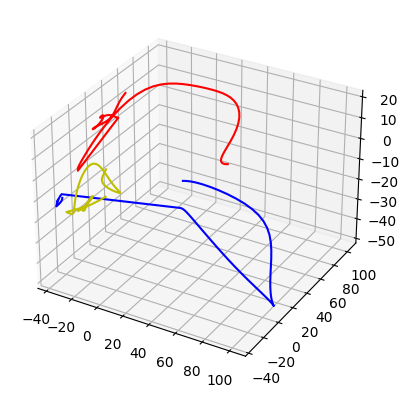

AS-M351_session2.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


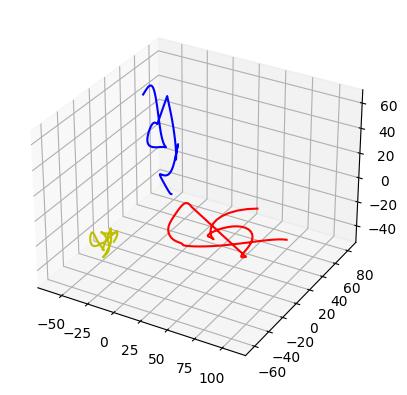

AS-M351_session3.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


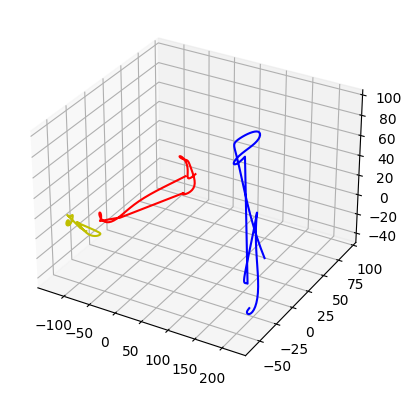

AS-M351_session4.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_23668\708648561.py:39: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [10

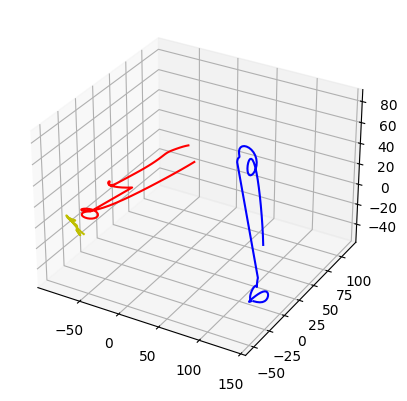

AS-M351_session5.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_23668\708648561.py:39: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [3]

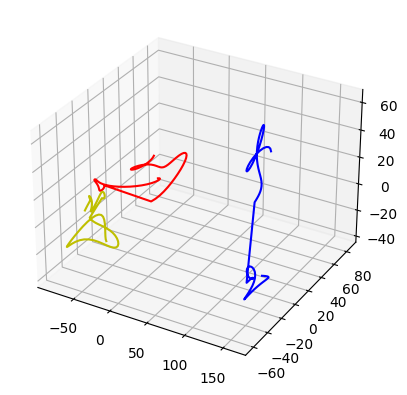

AS-M351_session6.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


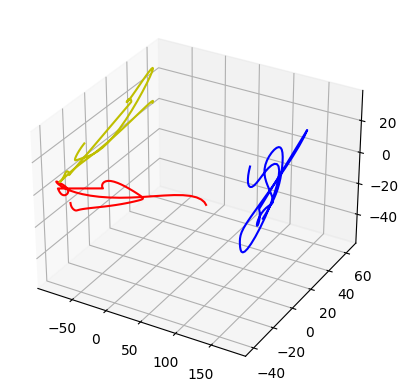

AS-M351_session7.mat


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")


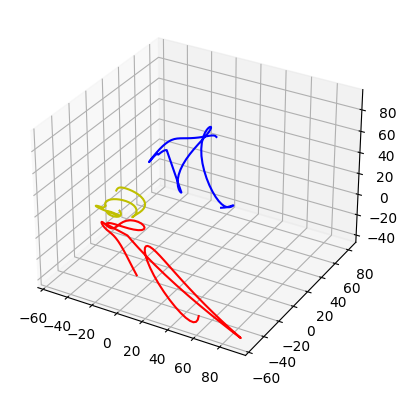

AS-M351_session8.mat
array field str_spikes could not be converted to int.


C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\Desktop\IMPERIAL YEAR 4\Final year project\code\PyalData\pyaldata\firing_rates.py:91: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn("Assuming spikes are actually spikes and dividing by bin size.")
C:\Users\MARA\AppData\Local\Temp\ipykernel_23668\708648561.py:39: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [1]

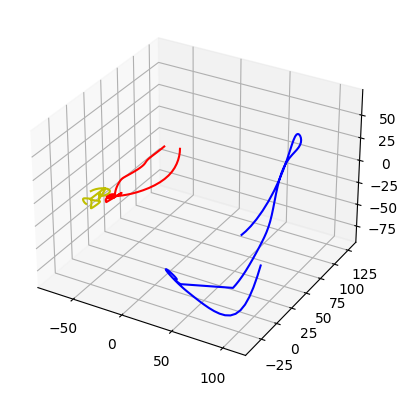

In [247]:
# consider all models, and no thalamus: compute 5D PCA manifolds for each trial, m1, dcn, str and finally all 3 regions
 
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

class_indices = {'WT-M350':1,
                'WT-M355':1, 
                'AS-M351':2,
                'AS-M354':2}
X_data_5 = {'WT':[],'AS':[]}
X_data_m1_5 = {'WT':[],'AS':[]}
X_data_dcn_5 = {'WT':[],'AS':[]}
X_data_str_5 = {'WT':[],'AS':[]}
X = []
y = []

for data_dir in [ data_dir_ASM351]:
    animal_model = data_dir[-17:-10]
    animal_type = data_dir[-17:-15]
    files = os.listdir(data_dir)
    for file_name in files:
        print(file_name)
        fpath = os.path.join(data_dir, file_name)
        df = pyaldata.mat2dataframe(fpath, shift_idx_fields=True)
        df = pyaldata.select_trials(df, "success == 1")  # only consider successful trials
        
        if len(df)>1:
            df["trial_id"] = range(len(df))
            df = pyaldata.combine_time_bins(df, 5)
            spike_fields = ["m1_spikes","dcn_spikes","str_spikes"]

            for col in spike_fields:
                df = pyaldata.remove_low_firing_neurons(df, col,  1)
            for col in spike_fields:
                df = pyaldata.transform_signal(df, col,  'sqrt')
            df = pyaldata.merge_signals(df, spike_fields, "all_spikes")
            df = pyaldata.add_firing_rates(df, 'smooth')
            df = pyaldata.restrict_to_interval(df, "idx_mo", end_point_name=None, rel_start=-50, rel_end=100)  # consider half a second before and after movement onset

            concat_all_rates = pyaldata.concat_trials(df, 'all_rates')
            concat_m1_rates = pyaldata.concat_trials(df,'m1_rates')
            concat_dcn_rates = pyaldata.concat_trials(df,'dcn_rates')
            concat_str_rates = pyaldata.concat_trials(df,'str_rates')

            all_pca_WTM355 = pca.fit_transform(concat_all_rates)
            

            min_size = min([np.shape(concat_m1_rates)[1], np.shape(concat_dcn_rates)[1], np.shape(concat_str_rates)[1]])

            concat_m1_rates = concat_m1_rates[:,:min_size]
            concat_dcn_rates = concat_dcn_rates[:,:min_size]
            concat_str_rates = concat_str_rates[:,:min_size]
            concat_concat = np.vstack([concat_m1_rates, concat_dcn_rates, concat_str_rates])

            # Apply PCA
            pca_model = PCA(n_components=3)
            pca_model.fit(concat_concat)
            principal_eigenvectors = pca_model.components_
            np.shape(principal_eigenvectors)

            m1_projected = pca_model.transform(concat_m1_rates)

            dcn_projected = pca_model.transform(concat_dcn_rates)
            str_projected = pca_model.transform(concat_str_rates)

            pc1 = m1_projected[101:202,0]
            pc2 = m1_projected[101:202,1]
            pc3 = m1_projected[101:202,2]

            pc11 = dcn_projected[101:202,0]
            pc21 = dcn_projected[101:202,1]
            pc31 = dcn_projected[101:202,2]

            pc12 = str_projected[101:202,0]
            pc22 = str_projected[101:202,1]
            pc32 = str_projected[101:202,2]

            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.plot(pc1,pc2,pc3,color="r")
            ax.plot(pc11,pc21,pc31,color='b')
            ax.plot(pc12,pc22,pc32,color='y')
            plt.show()



In [240]:
min([1,2,3])

1

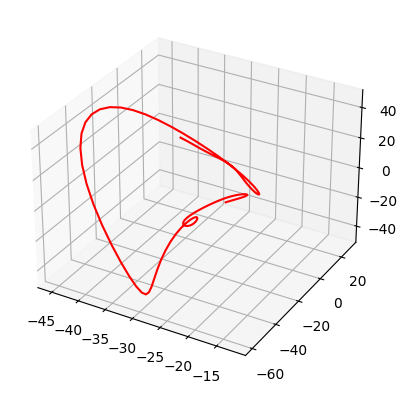

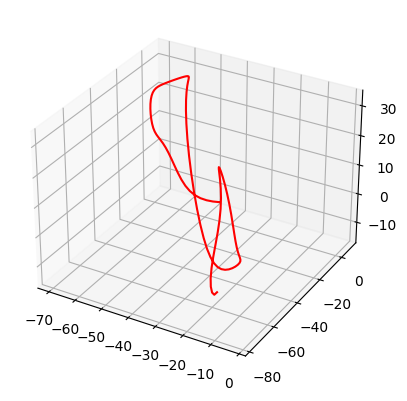

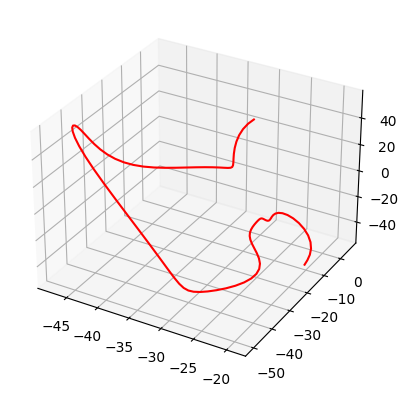

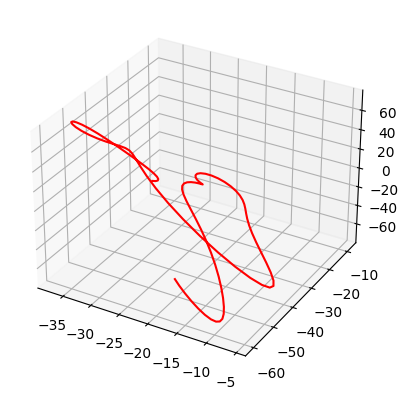

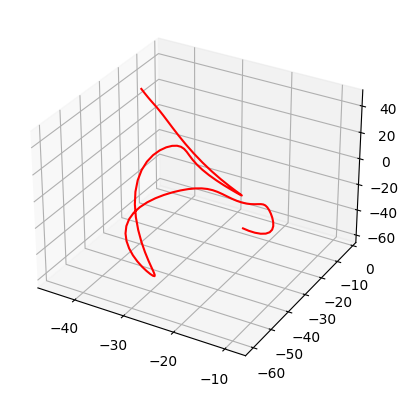

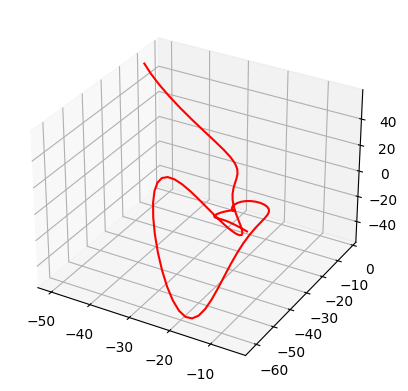

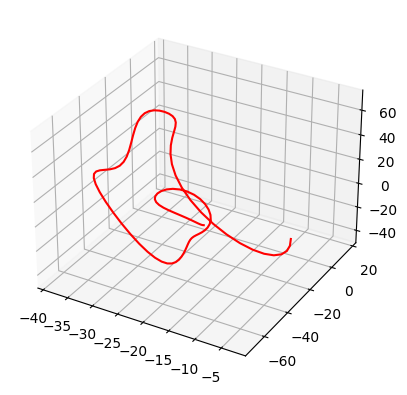

In [233]:
concat_m1_rates = concat_m1_rates[:,:32]
concat_dcn_rates = concat_dcn_rates[:,:32]
concat_str_rates = concat_str_rates[:,:32]
concat_concat = np.vstack([concat_m1_rates, concat_dcn_rates, concat_str_rates])

# Apply PCA
pca_model = PCA(n_components=3)
pca_model.fit(concat_concat)
principal_eigenvectors = pca_model.components_
np.shape(principal_eigenvectors)

m1_projected = pca_model.transform(concat_m1_rates)

dcn_projected = pca_model.transform(concat_dcn_rates)
str_projected = pca_model.transform(concat_str_rates)


for i in range(7,14):

    pc1 = m1_projected[101*i:101*(i+1),0]
    pc2 = m1_projected[101*i:101*(i+1),1]
    pc3 = m1_projected[101*i:101*(i+1),2]

    pc11 = dcn_projected[101*i:101*(i+1),0]
    pc21 = dcn_projected[101*i:101*(i+1),1]
    pc31 = dcn_projected[101*i:101*(i+1),2]

    pc12 = str_projected[101*i:101*(i+1),0]
    pc22 = str_projected[101*i:101*(i+1),1]
    pc32 = str_projected[101*i:101*(i+1),2]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(pc1,pc2,pc3,color="r")
    ax.plot(pc11,pc21,pc31,color='b')
    ax.plot(pc12,pc22,pc32,color='y')
    plt.show()

In [ ]:
# Project m1 data onto the principal eigenvectors
m1_projected = pca_model.transform(m1_data.T).T  # Transpose to get (3 x time bins)

# Project dcn data onto the principal eigenvectors
dcn_projected = pca_model.transform(dcn_data.T).T

# Project str data onto the principal eigenvectors
str_projected = pca_model.transform(str_data.T).T


In [ ]:
                # Extract the first three principal components
                pc1_m1 = m1_pca[:, 0]
                pc2_m1 = m1_pca[:, 1]
                pc3_m1 = m1_pca[:, 2]

                pc1_dcn = dcn_pca[:, 0]
                pc2_dcn = dcn_pca[:, 1]
                pc3_dcn = dcn_pca[:, 2]

                pc1_str = str_pca[:, 0]
                pc2_str = str_pca[:, 1]
                pc3_str = str_pca[:, 2]

                # Create the plot
                fig = plt.figure()
                ax = fig.add_subplot(111, projection='3d')
                ax.plot(pc1_m1, pc2_m1, pc3_m1)
                ax.plot(pc1_dcn, pc2_dcn, pc3_dcn)
                ax.plot(pc1_str, pc2_str, pc3_str)

                # Set labels
                ax.set_xlabel('Principal Component 1')
                ax.set_ylabel('Principal Component 2')
                ax.set_zlabel('Principal Component 3')

                plt.legend(['m1','dcn','str'])

                # Show plot
                plt.show()

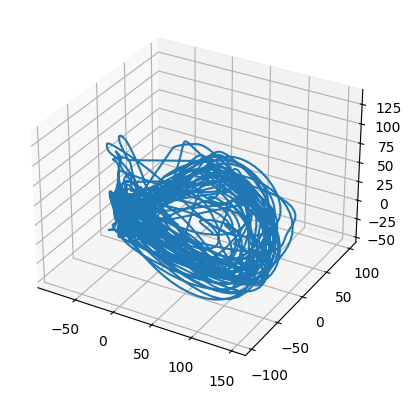

In [18]:
pc1 = all_pca_WTM355[:,0]
pc2 = all_pca_WTM355[:,1]
pc3 = all_pca_WTM355[:,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(pc1,pc2,pc3)
plt.show()

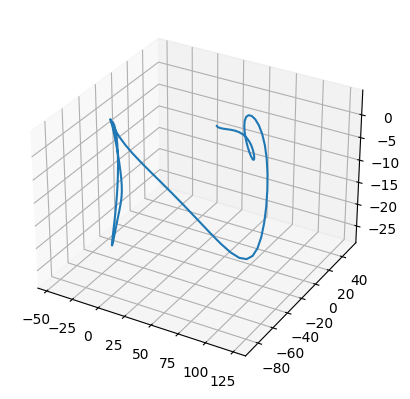

In [20]:
pc1 = all_pca_WTM355[0:101,0]
pc2 = all_pca_WTM355[0:101,1]
pc3 = all_pca_WTM355[0:101,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(pc1,pc2,pc3)
plt.show()

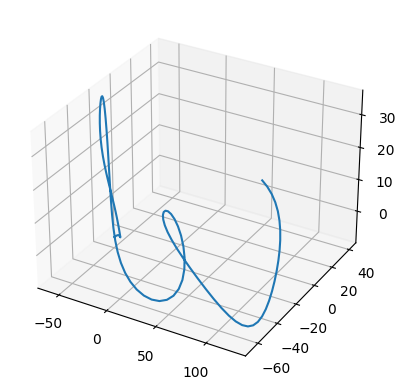

In [21]:
pc1 = all_pca_WTM355[101:202,0]
pc2 = all_pca_WTM355[101:202,1]
pc3 = all_pca_WTM355[101:202,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(pc1,pc2,pc3)
plt.show()

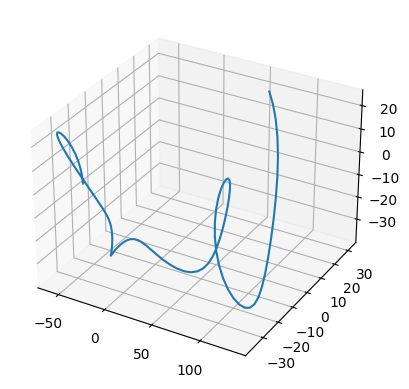

In [22]:
pc1 = all_pca_WTM355[202:303,0]
pc2 = all_pca_WTM355[202:303,1]
pc3 = all_pca_WTM355[202:303,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(pc1,pc2,pc3)
plt.show()

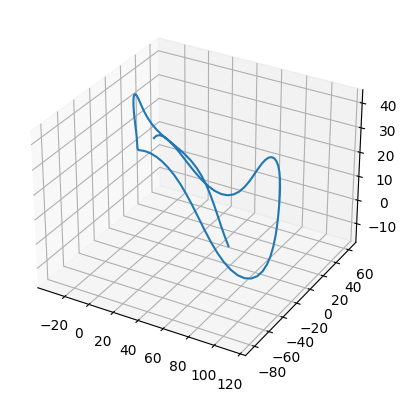

In [23]:
pc1 = all_pca_WTM355[303:404,0]
pc2 = all_pca_WTM355[303:404,1]
pc3 = all_pca_WTM355[303:404,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(pc1,pc2,pc3)
plt.show()

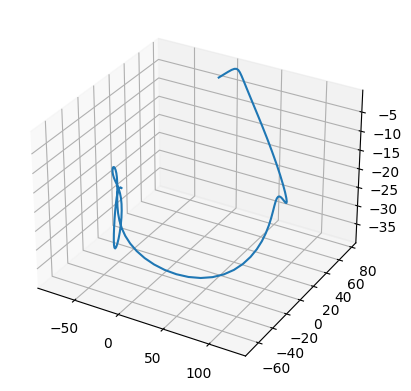

In [24]:
pc1 = all_pca_WTM355[404:505,0]
pc2 = all_pca_WTM355[404:505,1]
pc3 = all_pca_WTM355[404:505,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(pc1,pc2,pc3)
plt.show()

In [ ]:
all_pca_trasnposed = np.transpose

In [15]:
np.shape(m1_pca_ASM351)

(1717, 10)

In [ ]:
# Decoder from 10D PCA m1 activity to type:

random.shuffle(X_data_m1_5['WT'])
random.shuffle(X_data_m1_5['AS'])

min_samples = min(len(X_data_m1_5['WT']), len(X_data_m1_5['AS']))
X_WT = X_data_m1_5['WT'][0:min_samples]
X_AS = X_data_m1_5['AS'][0:min_samples]

# Step 3: Combine the sampled subsets
X_balanced = np.concatenate((X_WT, X_AS))
y_balanced = np.concatenate((['WT'] * min_samples, ['AS'] * min_samples))

# Optionally, shuffle the combined dataset
indices = np.arange(len(X_balanced))
np.random.shuffle(indices)
X_balanced = X_balanced[indices]
y_balanced = y_balanced[indices]

X_balanced_reshaped = X_balanced.reshape(len(X_balanced),-1)  # convert to 2d array (needed for the NB classifier)
y_balanced_reshaped = y_balanced.reshape(len(y_balanced),-1)


# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced_reshaped, y_balanced_reshaped, test_size=0.2, random_state=10)


# Initialize Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Train classifier
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)



In [5]:
np.shape(df.m1_rates[0])

(101, 54)

In [7]:
np.shape(df)

(43, 34)

In [6]:
np.shape(concat_m1_rates)

(4343, 54)

In [9]:
all_pca = pca.fit_transform(concat_m1_rates)

In [10]:
np.shape(all_pca)

(4343, 10)

In [ ]:
# Decoder from 10D PCA m1 activity to type:

random.shuffle(X_data_m1_5['WT'])
random.shuffle(X_data_m1_5['AS'])

min_samples = min(len(X_data_m1_5['WT']), len(X_data_m1_5['AS']))
X_WT = X_data_m1_5['WT'][0:min_samples]
X_AS = X_data_m1_5['AS'][0:min_samples]

# Step 3: Combine the sampled subsets
X_balanced = np.concatenate((X_WT, X_AS))
y_balanced = np.concatenate((['WT'] * min_samples, ['AS'] * min_samples))

# Optionally, shuffle the combined dataset
indices = np.arange(len(X_balanced))
np.random.shuffle(indices)
X_balanced = X_balanced[indices]
y_balanced = y_balanced[indices]

X_balanced_reshaped = X_balanced.reshape(len(X_balanced),-1)  # convert to 2d array (needed for the NB classifier)
y_balanced_reshaped = y_balanced.reshape(len(y_balanced),-1)


# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced_reshaped, y_balanced_reshaped, test_size=0.2, random_state=10)


# Initialize Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Train classifier
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)



Accuracy: 0.6582278481012658


c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Define k for k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=40)

# Perform k-fold cross-validation
scores = cross_val_score(classifier, X_balanced_reshaped, y_balanced_reshaped, cv=kf)
scores

c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConve

array([0.72151899, 0.67088608, 0.48101266, 0.6835443 , 0.71794872])

In [ ]:
# Decoder from 10D PCA str activity to type:


random.shuffle(X_data_str_5['WT'])
random.shuffle(X_data_str_5['AS'])

min_samples = min(len(X_data_str_5['WT']), len(X_data_str_5['AS']))
X_WT = X_data_str_5['WT'][0:min_samples]
X_AS = X_data_str_5['AS'][0:min_samples]

# Step 3: Combine the sampled subsets
X_balanced = np.concatenate((X_WT, X_AS))
y_balanced = np.concatenate((['WT'] * min_samples, ['AS'] * min_samples))

# Optionally, shuffle the combined dataset
indices = np.arange(len(X_balanced))
np.random.shuffle(indices)
X_balanced = X_balanced[indices]
y_balanced = y_balanced[indices]

X_balanced_reshaped = X_balanced.reshape(len(X_balanced),-1)  # convert to 2d array (needed for the NB classifier)
y_balanced_reshaped = y_balanced.reshape(len(y_balanced),-1)


# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced_reshaped, y_balanced_reshaped, test_size=0.2, random_state=10)


# Initialize Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Train classifier
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)



Accuracy: 0.7311827956989247


c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Define k for k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(classifier, X_balanced_reshaped, y_balanced_reshaped, cv=kf)
scores

c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConve

array([0.7311828 , 0.70967742, 0.66666667, 0.66666667, 0.67391304])

In [ ]:
# Decoder from 5D PCA dcn activity to type:

random.shuffle(X_data_dcn_5['WT'])
random.shuffle(X_data_dcn_5['AS'])

min_samples = min(len(X_data_dcn_5['WT']), len(X_data_dcn_5['AS']))
X_WT = X_data_dcn_5['WT'][0:min_samples]
X_AS = X_data_dcn_5['AS'][0:min_samples]

# Step 3: Combine the sampled subsets
X_balanced = np.concatenate((X_WT, X_AS))
y_balanced = np.concatenate((['WT'] * min_samples, ['AS'] * min_samples))

# Optionally, shuffle the combined dataset
indices = np.arange(len(X_balanced))
np.random.shuffle(indices)
X_balanced = X_balanced[indices]
y_balanced = y_balanced[indices]

X_balanced_reshaped = X_balanced.reshape(len(X_balanced),-1)  # convert to 2d array (needed for the NB classifier)
y_balanced_reshaped = y_balanced.reshape(len(y_balanced),-1)


# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced_reshaped, y_balanced_reshaped, test_size=0.2, random_state=10)


# Initialize Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Train classifier
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)



Accuracy: 0.9032258064516129


c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Define k for k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(classifier, X_balanced_reshaped, y_balanced_reshaped, cv=kf)
scores

c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConve

array([0.77419355, 0.74193548, 0.86021505, 0.86021505, 0.91304348])

In [ ]:
# SHUFFLE TO HAVE CONTROL RELATIVE:

# Decoder from 10D PCA dcn activity to type:

random.shuffle(X_data_dcn_5['WT'])
random.shuffle(X_data_dcn_5['AS'])

min_samples = min(len(X_data_dcn_5['WT']), len(X_data_dcn_5['AS']))
X_WT = X_data_dcn_5['WT'][0:min_samples]
X_AS = X_data_dcn_5['AS'][0:min_samples]

# Step 3: Combine the sampled subsets
X_balanced = np.concatenate((X_WT, X_AS))
y_balanced = np.concatenate((['WT'] * min_samples, ['AS'] * min_samples))

# Optionally, shuffle the combined dataset
indices = np.arange(len(X_balanced))
np.random.shuffle(indices)
X_balanced = X_balanced[indices]
y_balanced = y_balanced[indices]

X_balanced_reshaped = X_balanced.reshape(len(X_balanced),-1)  # convert to 2d array (needed for the NB classifier)
y_balanced_reshaped = y_balanced.reshape(len(y_balanced),-1)


# Shuffle X_balanced_reshaped for control performance:
random.shuffle(X_balanced_reshaped)



# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced_reshaped, y_balanced_reshaped, test_size=0.2, random_state=10)


# Initialize Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Train classifier
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)



Accuracy: 0.4731182795698925


c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Define k for k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(classifier, X_balanced_reshaped, y_balanced_reshaped, cv=kf)
scores

c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConve

array([0.46236559, 0.49462366, 0.46236559, 0.49462366, 0.5326087 ])

In [ ]:
# Decoder from 5D PCA all activity to type:

random.shuffle(X_data_5['WT'])
random.shuffle(X_data_5['AS'])

min_samples = min(len(X_data_5['WT']), len(X_data_5['AS']))
X_WT = X_data_5['WT'][0:min_samples]
X_AS = X_data_5['AS'][0:min_samples]
# Step 3: Combine the sampled subsets
X_balanced = np.concatenate((X_WT, X_AS))
y_balanced = np.concatenate((['WT'] * min_samples, ['AS'] * min_samples))

# Optionally, shuffle the combined dataset
indices = np.arange(len(X_balanced))
np.random.shuffle(indices)
X_balanced = X_balanced[indices]
y_balanced = y_balanced[indices]

X_balanced_reshaped = X_balanced.reshape(len(X_balanced),-1)  # convert to 2d array (needed for the NB classifier)
y_balanced_reshaped = y_balanced.reshape(len(y_balanced),-1)


# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced_reshaped, y_balanced_reshaped, test_size=0.2, random_state=10)


# Initialize Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Train classifier
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)



Accuracy: 0.7311827956989247


c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Define k for k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(classifier, X_balanced_reshaped, y_balanced_reshaped, cv=kf)
scores

c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConve

array([0.76344086, 0.78494624, 0.75268817, 0.7311828 , 0.77173913])

In [ ]:
# Decoder from 5D PCA all activity to type:

random.shuffle(X_data_5['WT'])
random.shuffle(X_data_5['AS'])

min_samples = min(len(X_data_5['WT']), len(X_data_5['AS']))
X_WT = X_data_5['WT'][0:min_samples]
X_AS = X_data_5['AS'][0:min_samples]

# Step 3: Combine the sampled subsets
X_balanced = np.concatenate((X_WT, X_AS))
y_balanced = np.concatenate((['WT'] * min_samples, ['AS'] * min_samples))

# Optionally, shuffle the combined dataset
indices = np.arange(len(X_balanced))
np.random.shuffle(indices)
X_balanced = X_balanced[indices]
y_balanced = y_balanced[indices]


X_balanced_reshaped = X_balanced.reshape(len(X_balanced),-1)  # convert to 2d array (needed for the NB classifier)
y_balanced_reshaped = y_balanced.reshape(len(y_balanced),-1)

# Shuffle X_balanced_reshaped for control performance:
random.shuffle(X_balanced_reshaped)

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced_reshaped, y_balanced_reshaped, test_size=0.2, random_state=10)


# Initialize Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Train classifier
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)



Accuracy: 0.5161290322580645


c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Define k for k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation

# Shuffle X_balanced_reshaped for control:
random.shuffle(X_balanced_reshaped)
scores = cross_val_score(classifier, X_balanced_reshaped, y_balanced_reshaped, cv=kf)
scores

c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConve

array([0.46236559, 0.43010753, 0.46236559, 0.46236559, 0.39130435])

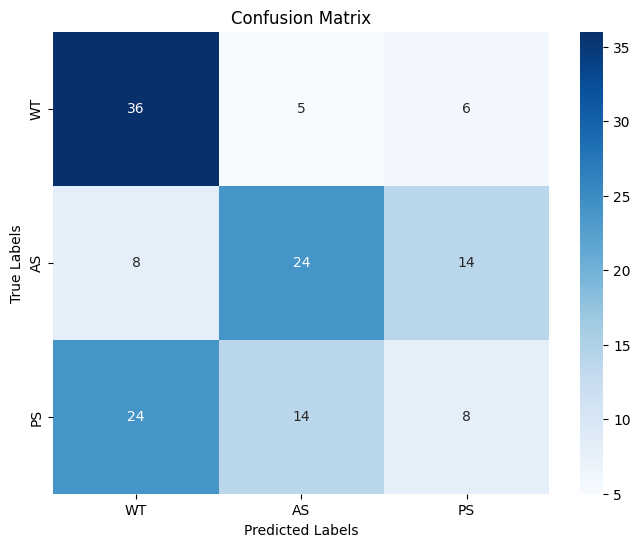

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Compute the confusion matrix
class_names = ['WT','AS']

cm = confusion_matrix(y_test, predictions, labels=class_names)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


Stratified K-Fold Cross-Validation
Fold 1, Accuracy: 0.54


c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


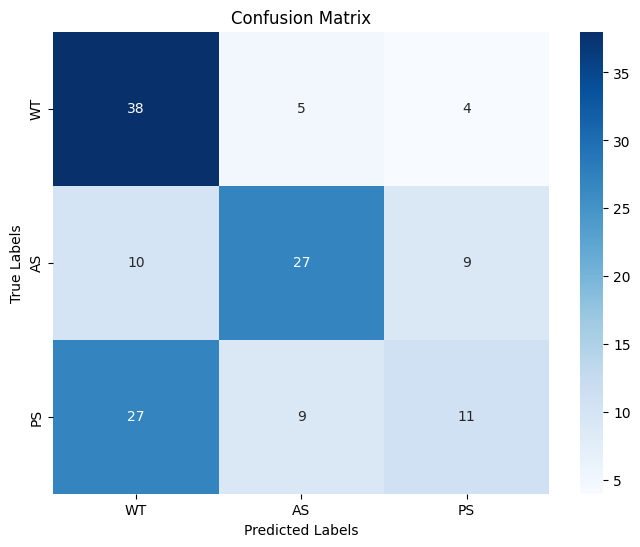

Fold 2, Accuracy: 0.51


c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


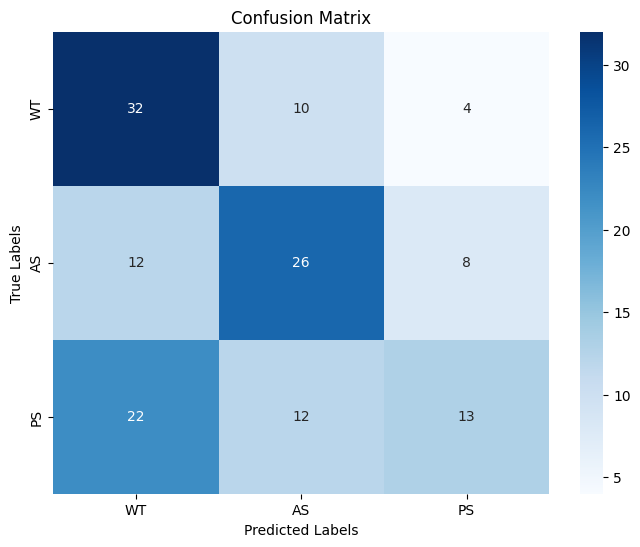

c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3, Accuracy: 0.47


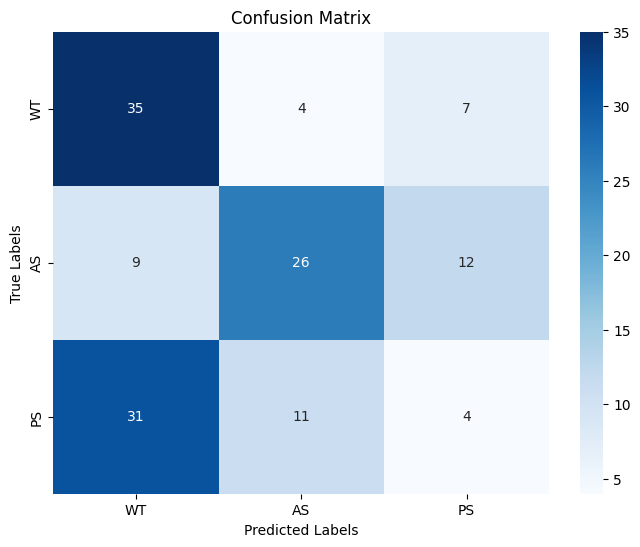

Fold 4, Accuracy: 0.54


c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


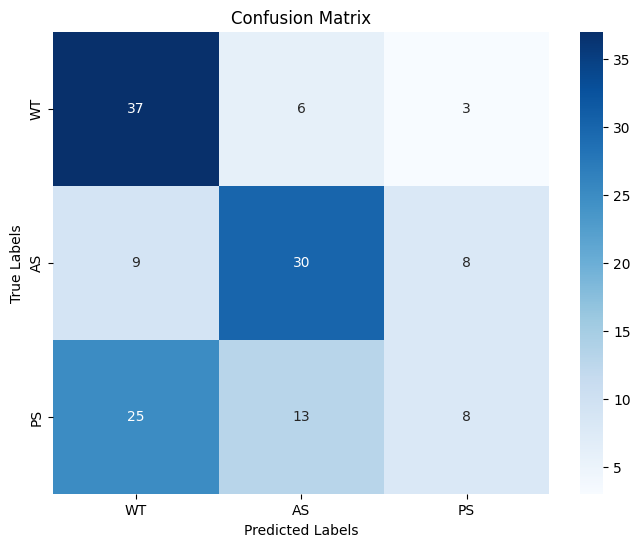

Fold 5, Accuracy: 0.49


c:\Users\MARA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


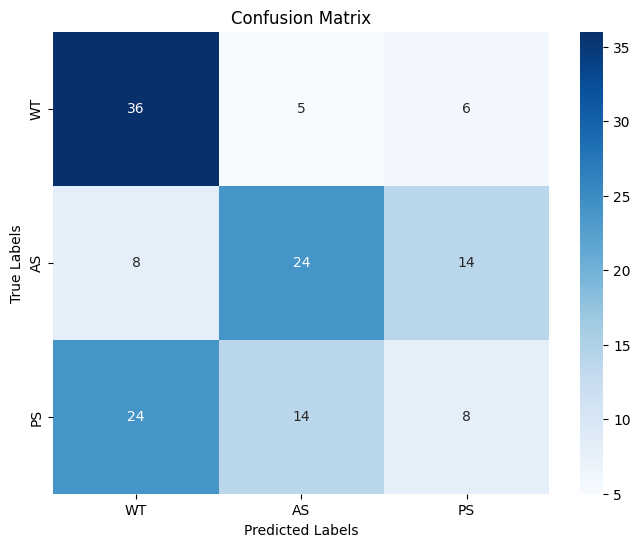

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

# Sample data
X = X_balanced_reshaped  # Feature array
y = y_balanced_reshaped  # Class labels

# Stratified K-Fold Cross-Validation
print("Stratified K-Fold Cross-Validation")
skf = StratifiedKFold(n_splits=5)
fold = 0
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Fold {fold + 1}, Accuracy: {accuracy:.2f}")
    fold +=1

    class_names = ['WT','AS']

    cm = confusion_matrix(y_test, predictions, labels=class_names)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    # Show the plot
    plt.show()











In [ ]:
cm

array([[21, 16,  9],
       [ 9, 23, 14],
       [ 5, 13, 28]], dtype=int64)

In [ ]:
predictions=='WT'

array([ True,  True,  True, False,  True,  True,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
        True, False,  True, False, False, False,  True,  True, False,
       False, False,  True, False,  True,  True,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False,  True, False,  True,  True,  True,
       False, False, False, False,  True,  True,  True, False, False,
        True,  True,  True, False,  True,  True, False,  True, False,
        True, False, False,  True, False,  True, False, False, False,
        True,  True, False, False, False,  True, False, False,  True,
       False,  True,  True, False, False,  True,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

In [ ]:
y_test=='WT'

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [